# Optimize paramters passed to gap_fit with gradient descent method, but just on one data set (training or test)

## Omptimizing RMSE

In [1]:
# Importing everthing we need 
import sys
sys.path.append('../')

from GAP.gapmodels import GAPModel
from GAP.gapmodels import Split
from GAP.gapdescriptors import distance_2b
from GAP.gapplot import QualityPlot
import matplotlib.pyplot as plt
from textwrap import wrap

## fixed parameters 

In [2]:
cutoff = [3]
n_sparse = [15]
delta = [1]
sparse_method = ['UNIFORM']
covariance_type = ['ARD_SE']
sigma_fixed = ['0.0 0.0'] # sigma for hessian and virial stress is not used and hence won't be optimized

## variable parameters

In [3]:
theta = 1
sigma_energy = 1
sigma_force = 1




## Split up the Data 

In [4]:
## Import Hydrogen_MD Data and split into training and test data, use split 80%/20%
data='/Users/simon/simon_ml/tools/hydrogen_tuple_mdcart.xyz'
train_percentage = 0.8
split = Split(data, train_percentage)

#Perform the acutal split
train_file = 'train.xyz'
test_file = 'test.xyz'
split.split(train_file, test_file)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "forces" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ase/io/extxyz.py:997: UserWarning: write_xyz() overwriting array "energies" present in atoms.arrays with stored results from calculator
  warnings.warn('write_xyz() overwriting array "{0}" present '


## Make function that is used for optimization. RMSE takes the 3 variable parameters as input and outputs and RMSE error

In [19]:
data_file = 'train.xyz'
def RMSE_train(tef):
    theta,sigma_energy,sigma_force = tef[0],tef[1],tef[2]
    data_file = 'train.xyz'
    # Initialize all parameters, fixed and variable
    cutoff = 3
    n_sparse = 15
    delta = 1
    sparse_method = 'UNIFORM'
    covariance_type = 'ARD_SE'
    sigma_fixed = '0.0 0.0' # sigma for hessian and virial stress is not used and hence won't be optimized
    theta = theta
    sigma_energy = sigma_energy
    sigma_force = sigma_force
    sigma = f"{sigma_energy} {sigma_force} {sigma_fixed}"
    descriptor_2b = distance_2b(cutoff=cutoff, covariance_type=covariance_type,delta=delta,theta_uniform=theta,
                                n_sparse=n_sparse, sparse_method=sparse_method,add_species='T')
    
    # Get parameter string
    parameters = descriptor_2b.get_parameter_string()
    
    # Make model
    model = GAPModel()

    # Select filename in which potential should be stored 
    potential=f"GAP.xml"

    # Train model
    model.train(parameters, training_data=data_file,GAP_potential=potential,sigma=sigma,print_output=False)

    # Select filename in which predictions should be stored for prediction data 
    prediction_file= f"quip_2b.xyz"

    # Predict energies on training data
    model.predict(Test_Data=data_file, GAP_potential=potential, QUIP_Prediction=prediction_file,print_output=False)
    
    # Calculate RMSE of error
    RMSE = model.energy_RMSE(data_file,prediction_file) + model.force_RMSE(data_file,prediction_file) 
    

    # Make Plot 
    plot = QualityPlot()
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=data_file, predicted_values=prediction_file, 
                            axis=axs[0],
                            title="\n".join(wrap(f"Energy of Training Data"
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=data_file, predicted_values=prediction_file, 
                        axis=axs[1],
                        title="\n".join(wrap(f"Force of Training Data"
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    # Get real and predicted energies
    #real_energies, predicted_energies = model.getEnergies('train.xyz','quip_2b.xyz')
    
    return RMSE

## Use Steepest decent method to optimize the RMSE function on training data

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.05 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.95 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8999999999999999 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.9333333333333333 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_ty

<ipython-input-19-c054db87037e>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=1,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2888888888888875 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.11481481481481287 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.022222222222219923 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.009876543209874411 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.21913580246913422 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.0744855967078169 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.18528806584361973 sparse_meth

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07308310581019223 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.10158100583752469 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.08258240581930304 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.09683135583296928 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.08733205582385845 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.07097687897692911 sparse_method = UNIFORM add_species = T n_sparse = 15
 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.0948777761973442 sparse_metho

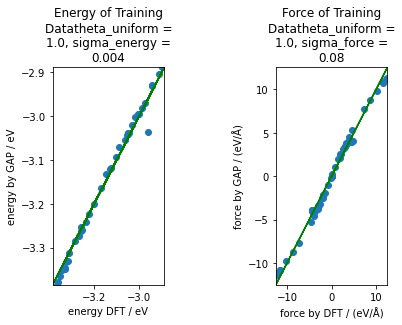

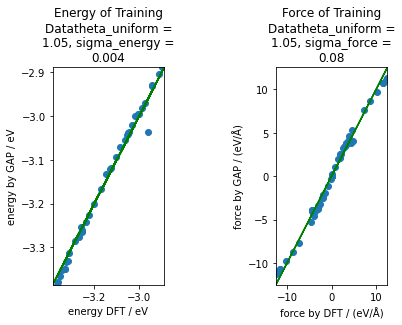

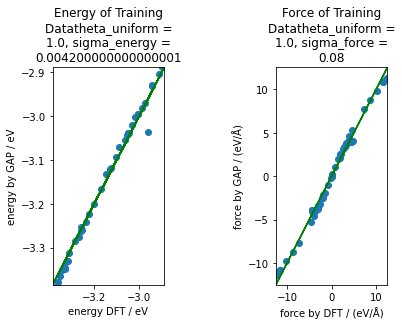

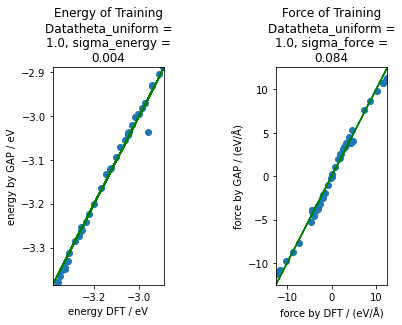

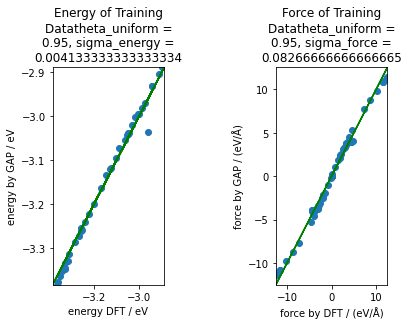

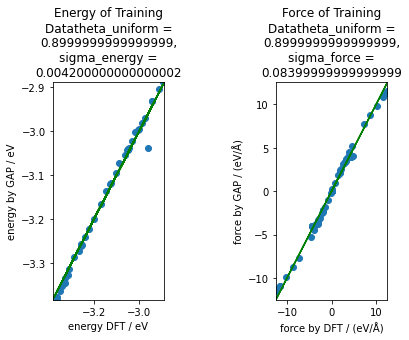

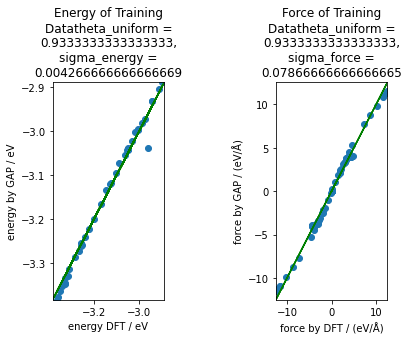

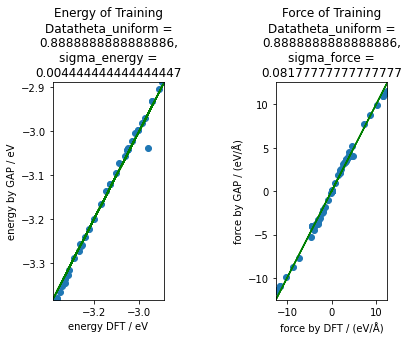

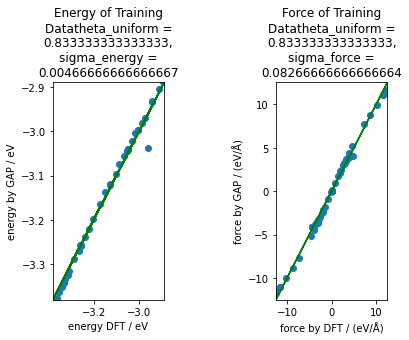

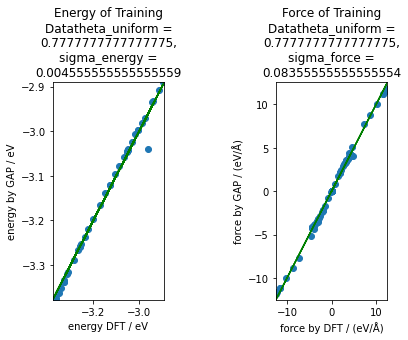

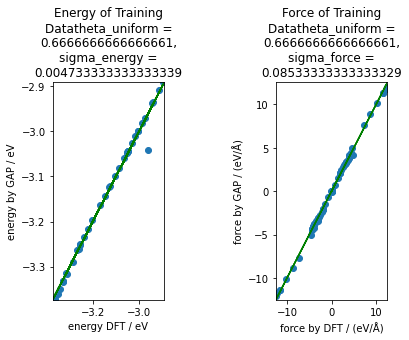

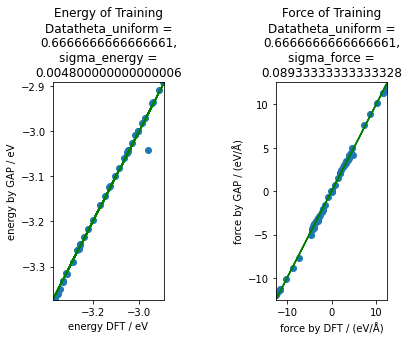

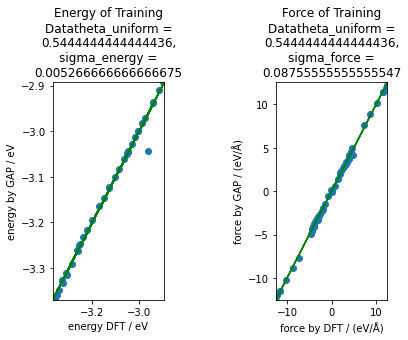

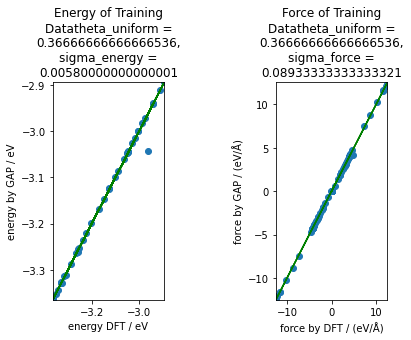

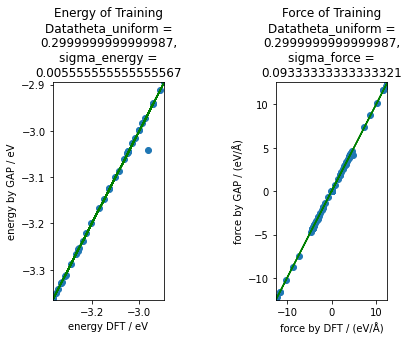

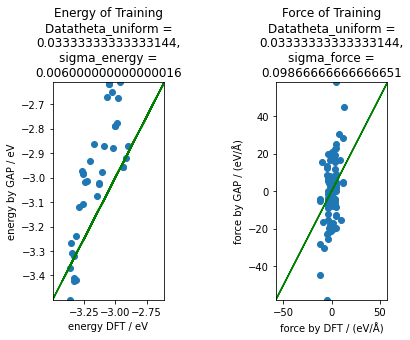

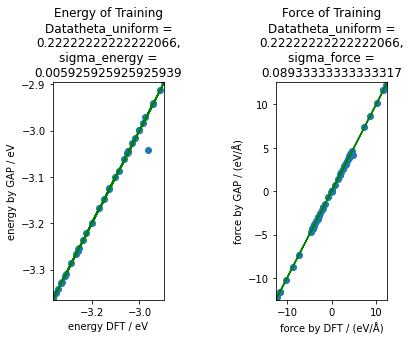

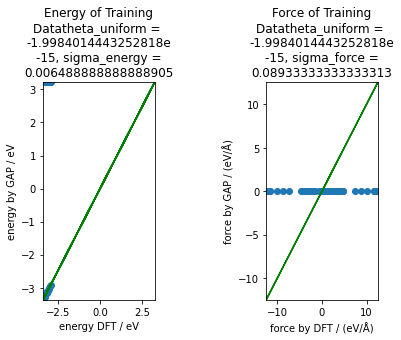

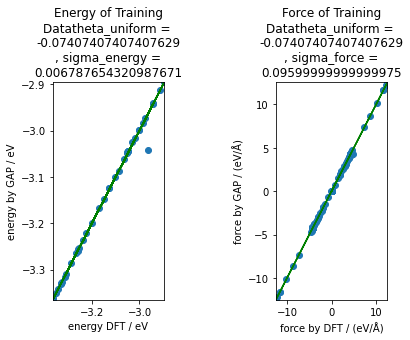

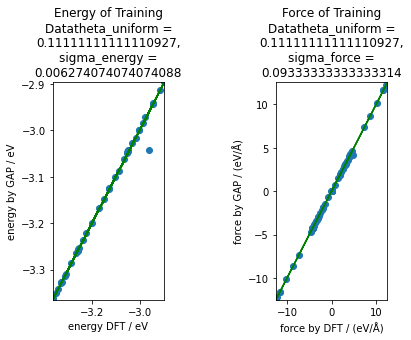

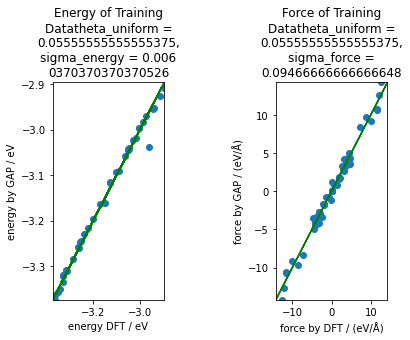

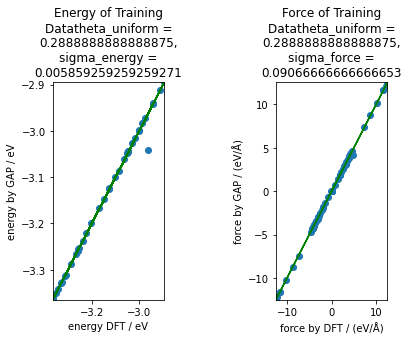

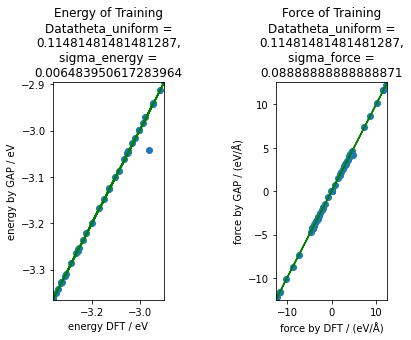

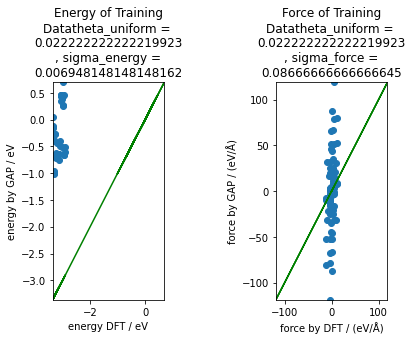

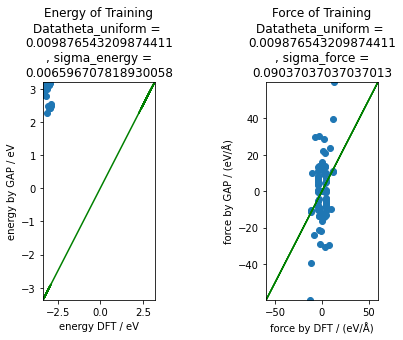

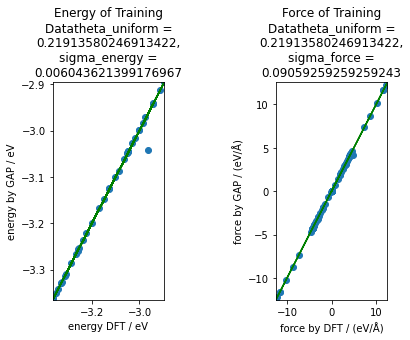

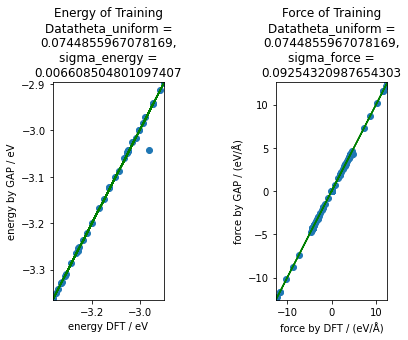

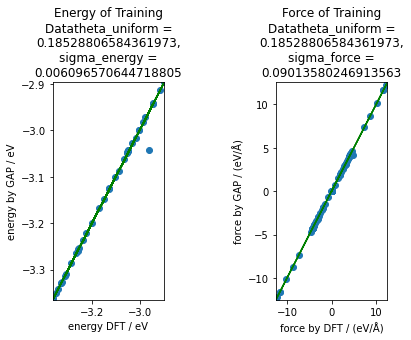

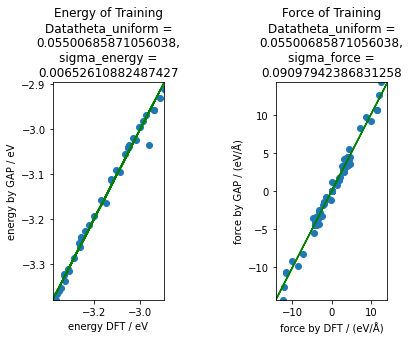

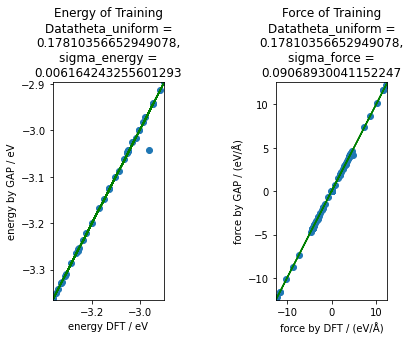

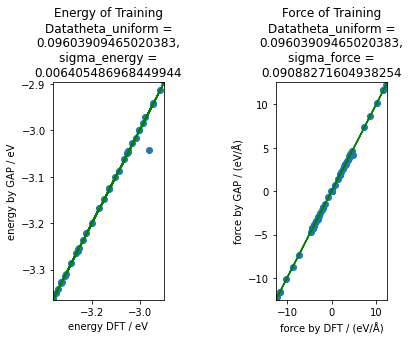

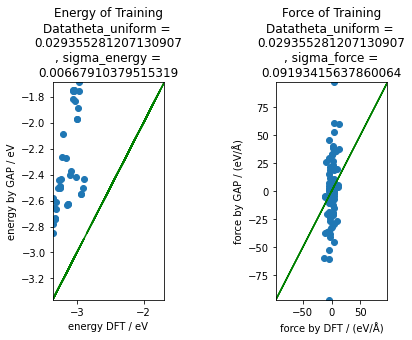

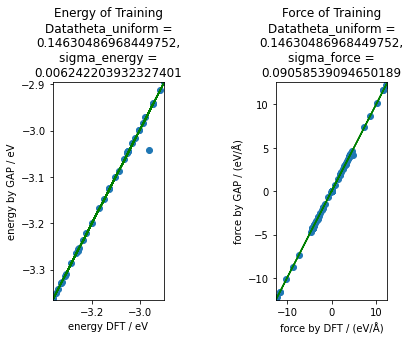

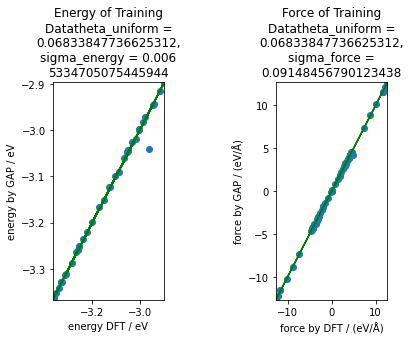

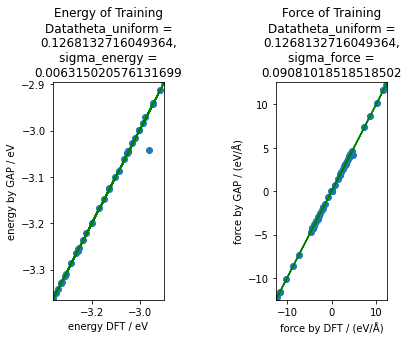

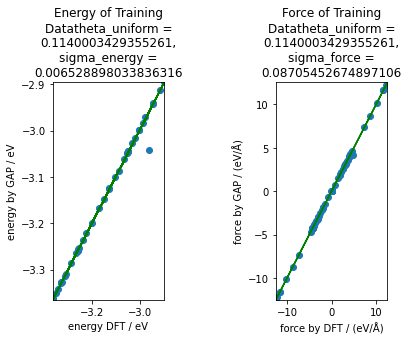

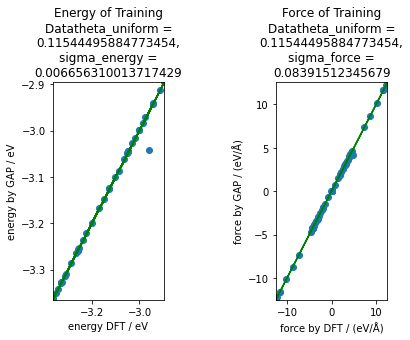

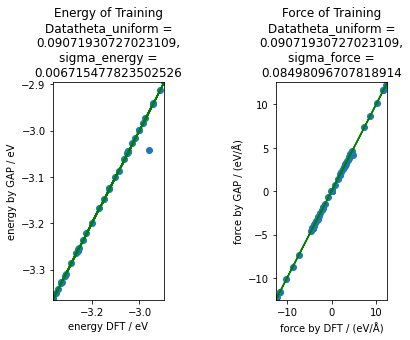

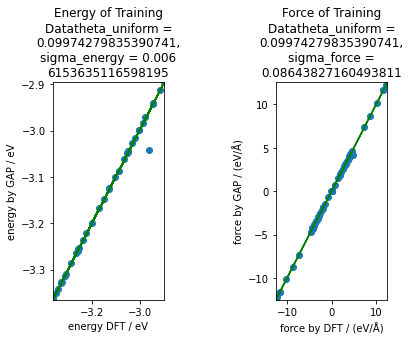

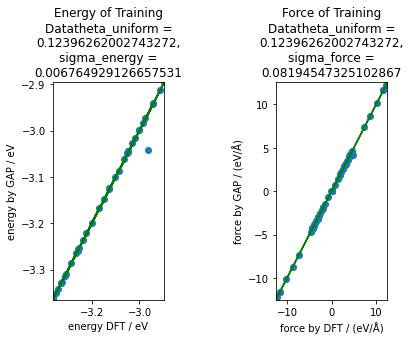

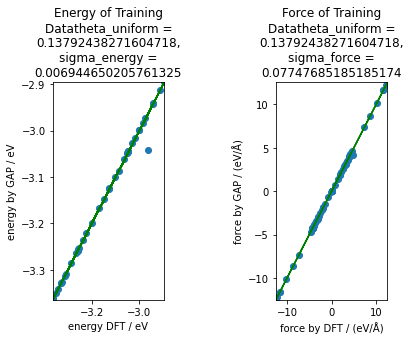

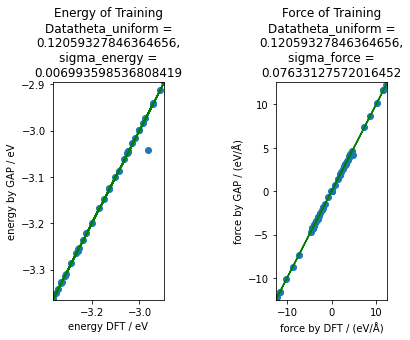

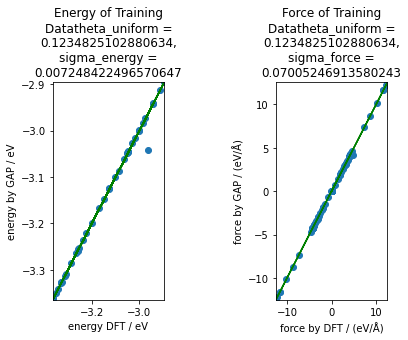

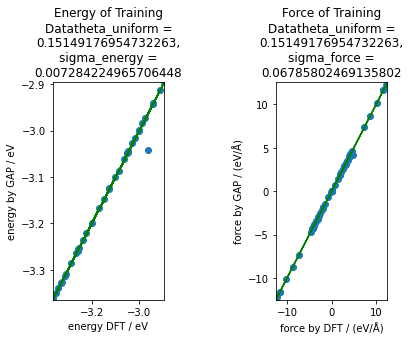

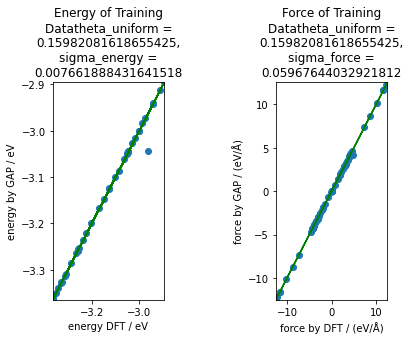

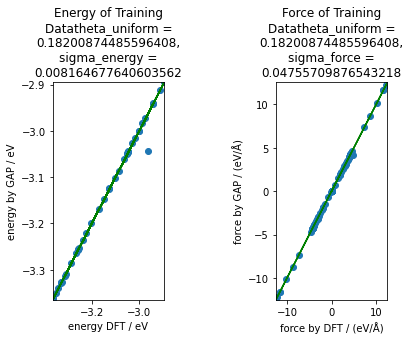

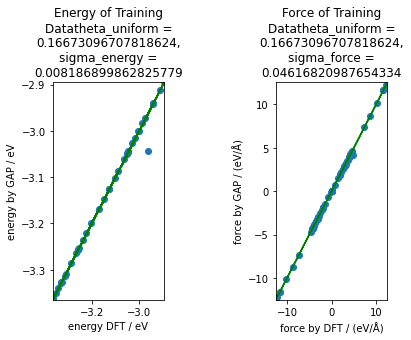

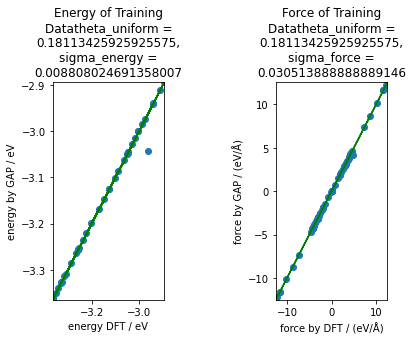

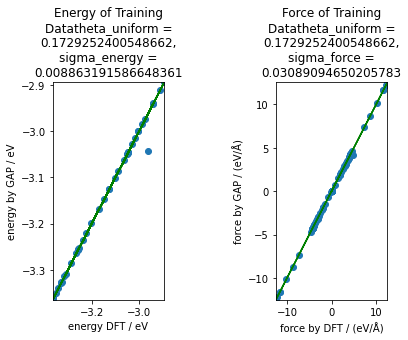

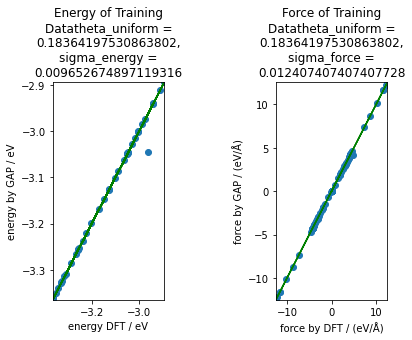

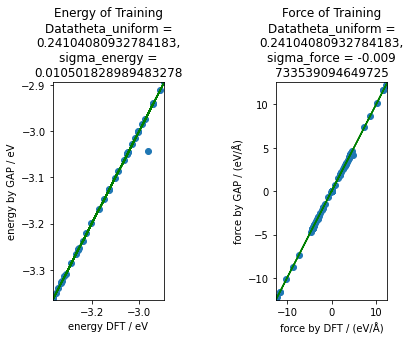

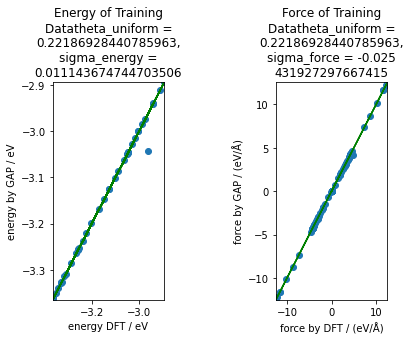

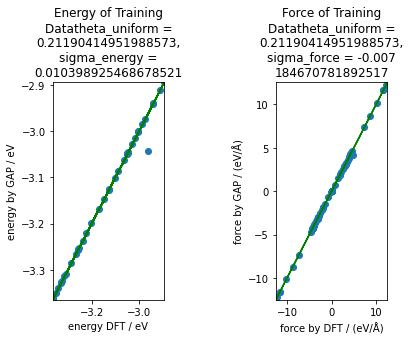

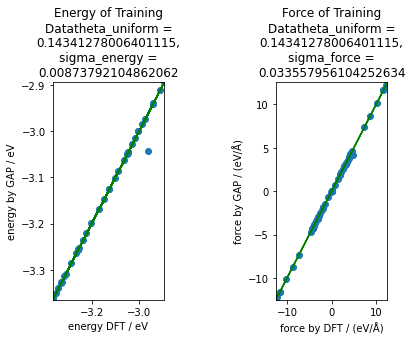

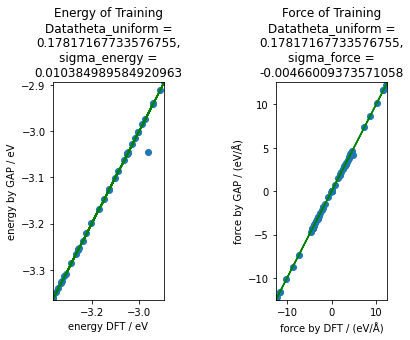

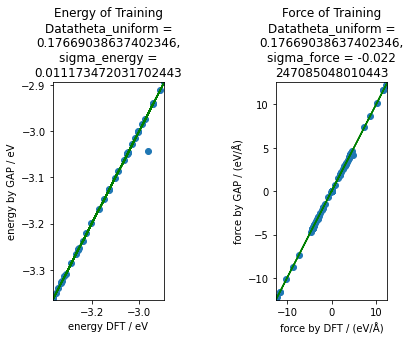

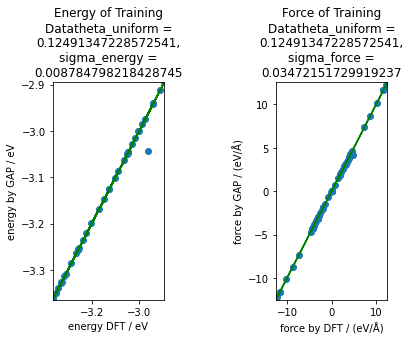

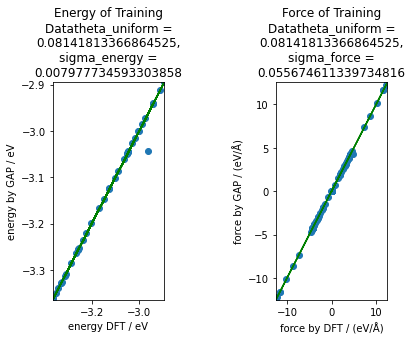

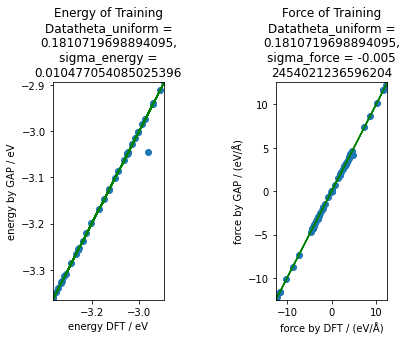

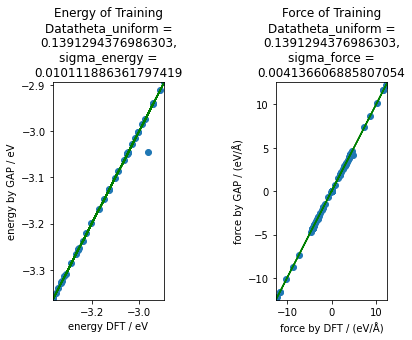

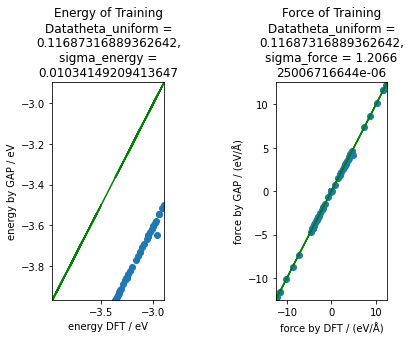

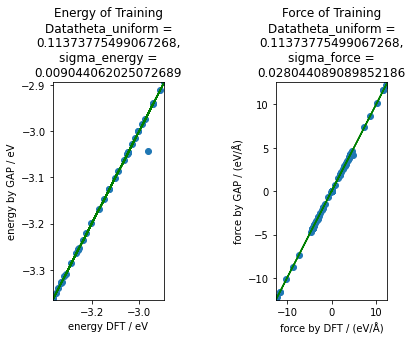

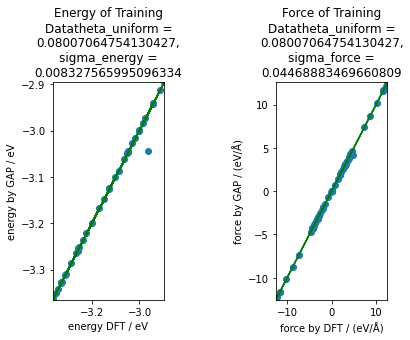

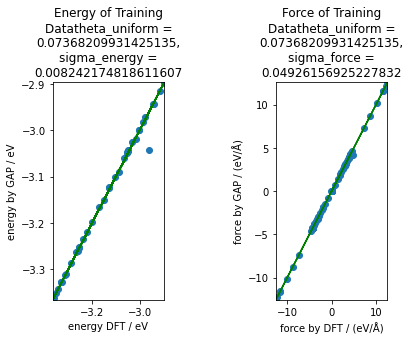

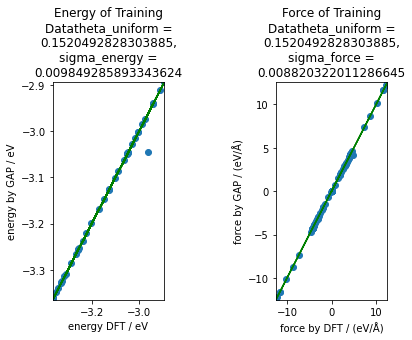

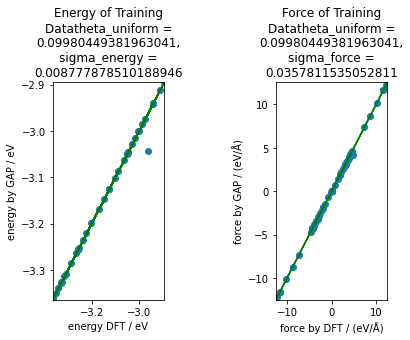

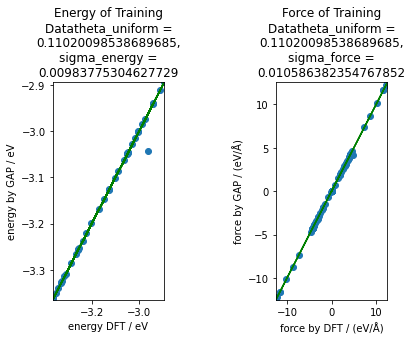

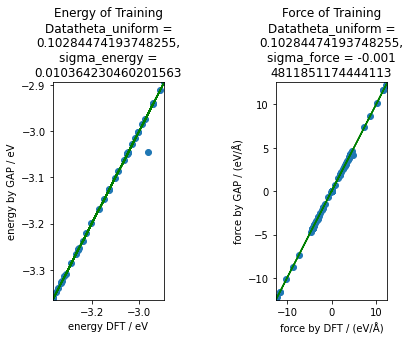

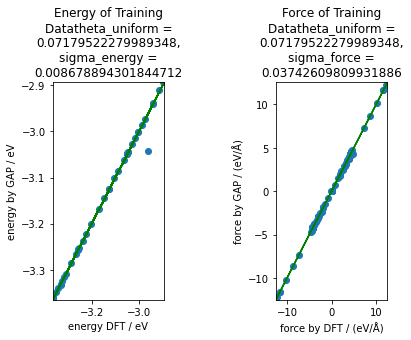

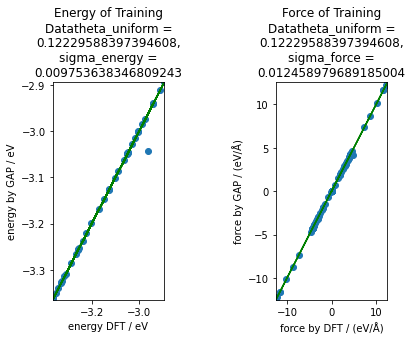

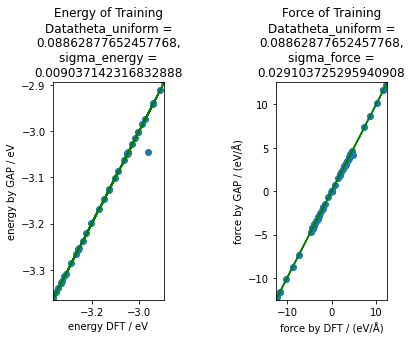

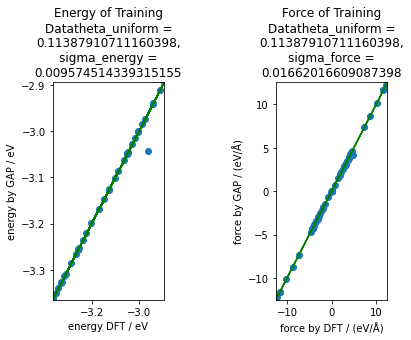

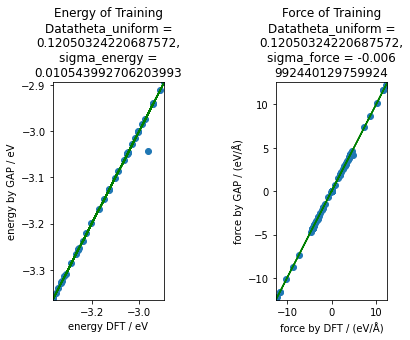

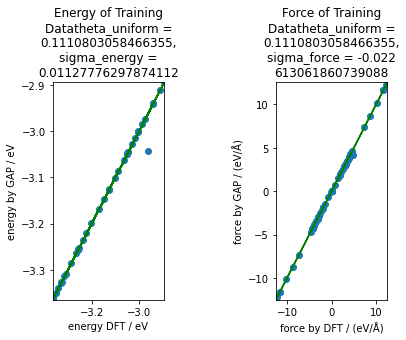

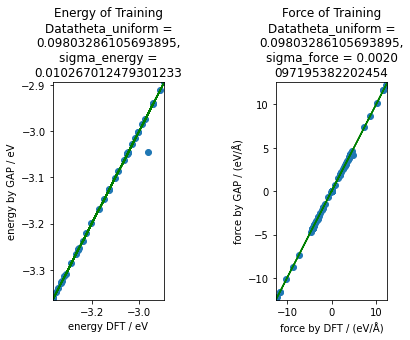

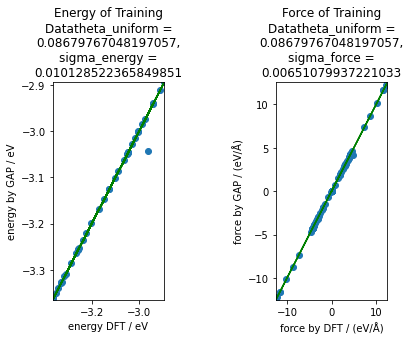

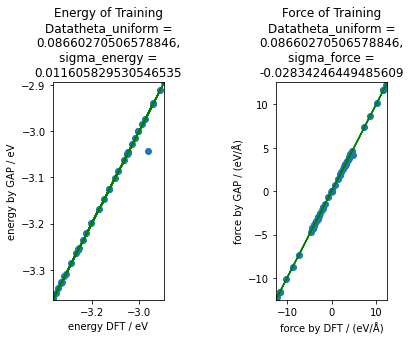

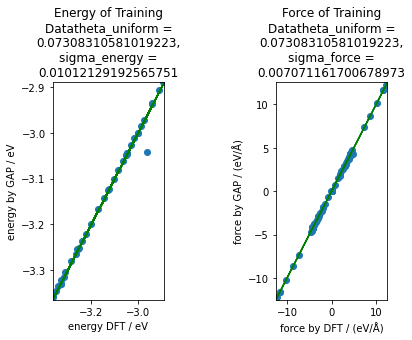

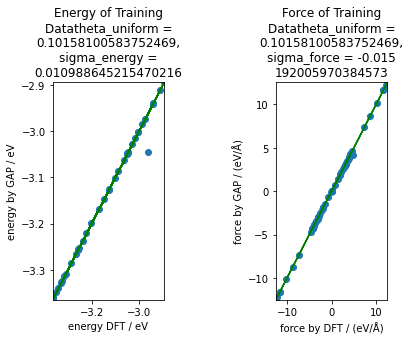

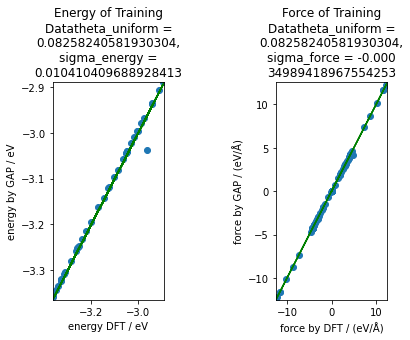

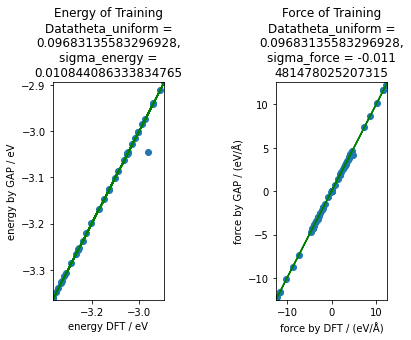

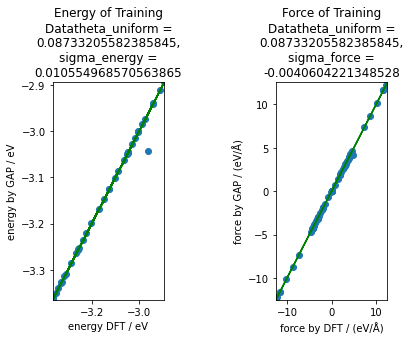

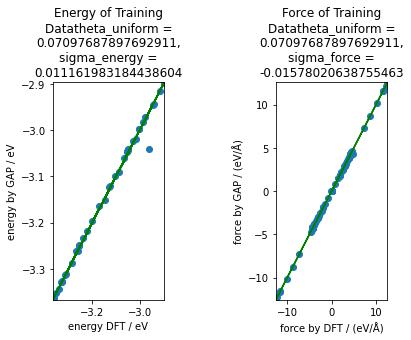

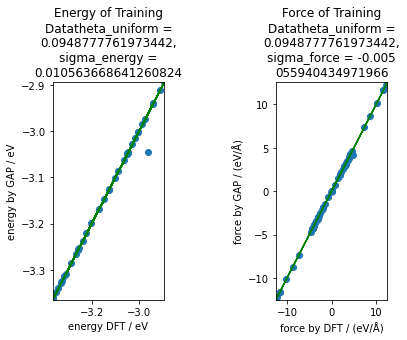

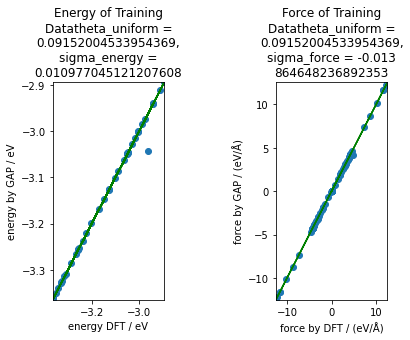

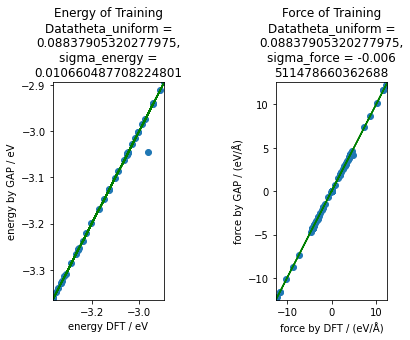

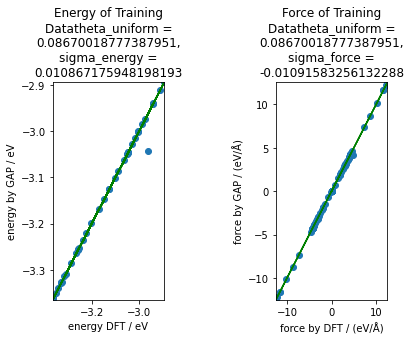

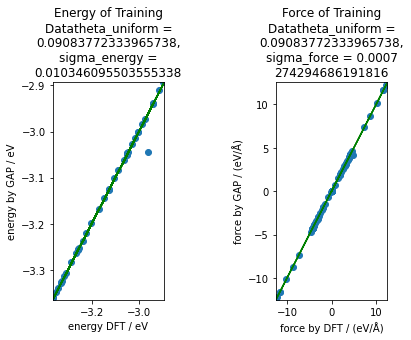

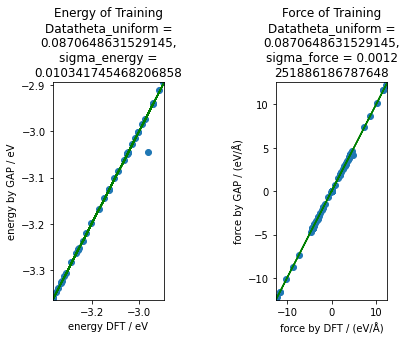

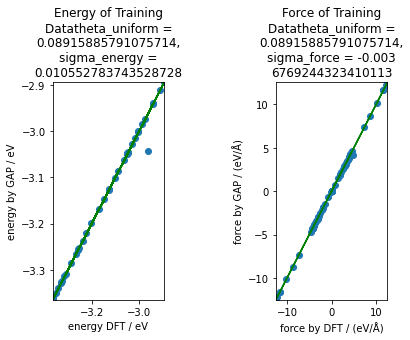

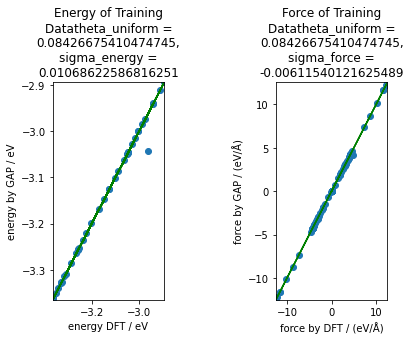

In [29]:
import scipy.optimize
initial_guess = [1,0.004,0.08]
result = scipy.optimize.minimize(RMSE_train,initial_guess,method='Nelder-Mead',
                                 options={'fatol':10e-5,'maxiter':50,'disp':True})


In [33]:
result

 final_simplex: (array([[ 0.08670019,  0.01086718, -0.01091583],
       [ 0.08679767,  0.01012852,  0.0065108 ],
       [ 0.08426675,  0.01068623, -0.0061154 ],
       [ 0.08915886,  0.01055278, -0.00367692]]), array([0.07870128, 0.07870275, 0.07870927, 0.07871843]))
           fun: 0.0787012831171198
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 91
           nit: 50
        status: 2
       success: False
             x: array([ 0.08670019,  0.01086718, -0.01091583])

## Minimize RMSE, add up RMSE for training and validation data

In [38]:
data_file = 'train.xyz'
validation_file = 'test.xyz'
def RMSE_train_val(tef):
    theta,sigma_energy,sigma_force = tef[0],tef[1],tef[2]
    data_file = 'train.xyz'
    validation_file = 'test.xyz'
    # Initialize all parameters, fixed and variable
    cutoff = 3
    n_sparse = 15
    delta = 1
    sparse_method = 'UNIFORM'
    covariance_type = 'ARD_SE'
    sigma_fixed = '0.0 0.0' # sigma for hessian and virial stress is not used and hence won't be optimized
    theta = theta
    sigma_energy = sigma_energy
    sigma_force = sigma_force
    sigma = f"{sigma_energy} {sigma_force} {sigma_fixed}"
    descriptor_2b = distance_2b(cutoff=cutoff, covariance_type=covariance_type,delta=delta,theta_uniform=theta,
                                n_sparse=n_sparse, sparse_method=sparse_method,add_species='T')
    
    # Get parameter string
    parameters = descriptor_2b.get_parameter_string()
    
    # Make model
    model = GAPModel()

    # Select filename in which potential should be stored 
    potential=f"GAP.xml"

    # Train model
    model.train(parameters, training_data=data_file,GAP_potential=potential,sigma=sigma,print_output=True)

    # Select filename in which predictions should be stored for prediction data
    prediction_file_tr= f"quip_2btrain.xyz"
    prediction_file_val= f"quip_2bvalidate.xyz"

    # Predict energies on training data
    model.predict(Test_Data=data_file, GAP_potential=potential, QUIP_Prediction=prediction_file_tr,print_output=True)
    
    # Predict energies on validation data
    model.predict(Test_Data=validation_file, GAP_potential=potential, QUIP_Prediction=prediction_file_val,print_output=True)
    
    
    # Calculate RMSE of error
    rmse_energy_train = model.energy_RMSE(data_file,prediction_file_tr)
    rmse_force_train = model.force_RMSE(data_file,prediction_file_tr) 
    rmse_energy_validate = model.energy_RMSE(validation_file,prediction_file_val)
    rmse_force_validate = model.force_RMSE(validation_file,prediction_file_val)
    RMSE = rmse_energy_train*10e+2 + rmse_force_train/576 + rmse_energy_validate*10e+2 + rmse_force_validate/576
    

    # Make Plot 
    plot = QualityPlot()
    # Make subplots object, returning axis object which is going to be passed to QualityPlot
    figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})

    # Plot predicted energies of training data against real energies of training data
    plot.energies_on_energies(real_values=data_file, predicted_values=prediction_file_tr, 
                            axis=axs[0,0],
                            title="\n".join(wrap(f"Energy of Training Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=data_file, predicted_values=prediction_file_tr, 
                        axis=axs[0,1],
                        title="\n".join(wrap(f"Force of Training Data "
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    
    plot.energies_on_energies(real_values=validation_file, predicted_values=prediction_file_val, 
                            axis=axs[1,0],
                            title="\n".join(wrap(f"Energy of Validation Data "
                            f"theta_uniform = {theta}, sigma_energy = {sigma_energy}",20)))
    
    plot.forces_on_forces(real_values=validation_file, predicted_values=prediction_file_val, 
                        axis=axs[1,1],
                        title="\n".join(wrap(f"Force of Validation Data "
                        f"theta_uniform = {theta}, sigma_force = {sigma_force}",20)))
    # Get real and predicted energies
    #real_energies, predicted_energies = model.getEnergies('train.xyz','quip_2b.xyz')
    
    return -RMSE

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004 0.08 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:20
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42620982
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ==============================

atoms_filename = //MANDATORY//
at_file = train.xyz



 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.05 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004 0.08 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.05 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:21
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42621763
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


=============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004200000000000001 0.08 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:22
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42622656
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default





 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004 0.084 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 1.0 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:23
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42623432
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


==============


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.95 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004133333333333334 0.08266666666666665 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.95 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:24
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42624831
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do noth


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8999999999999999 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004200000000000002 0.08399999999999999 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8999999999999999 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:25
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42625856
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.9333333333333333 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.003933333333333334 0.08533333333333333 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.9333333333333333 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:26
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42626918
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8888888888888886 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.00408888888888889 0.08888888888888889 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.8888888888888886 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:27
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42627803
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.833333333333333 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004133333333333336 0.09333333333333335 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.833333333333333 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:28
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42628629
libAtoms::Hello World: global verbosity = 0

Calls to


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.7777777777777775 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004177777777777782 0.0911111111111111 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.7777777777777775 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:29
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42629524
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.6666666666666661 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004266666666666672 0.09466666666666665 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.6666666666666661 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:30
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42630374
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.6666666666666661 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004466666666666673 0.09600000000000002 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.6666666666666661 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:31
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42631297
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.5444444444444436 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004377777777777784 0.10533333333333336 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.5444444444444436 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:32
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42632146
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.36666666666666536 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004466666666666674 0.11600000000000005 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.36666666666666536 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:33
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42633066
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2999999999999987 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004666666666666677 0.1111111111111111 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2999999999999987 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:34
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42634107
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.03333333333333144 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004933333333333347 0.12 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.03333333333333144 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:35
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42635077
libAtoms::Hello World: global verbosity = 0

Calls to system_tim


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22222222222222066 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004466666666666676 0.11851851851851854 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22222222222222066 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:36
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42636105
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = -1.9984014443252818e-15 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004466666666666678 0.1297777777777778 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = -1.9984014443252818e-15 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:37
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42637122
libAtoms::Hello World: global verbosity = 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = -0.07407407407407629 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004800000000000013 0.13575308641975314 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = -0.07407407407407629 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:38
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42638084
libAtoms::Hello World: global verbosity = 0

Ca


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = -0.06790123456790331 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004822222222222236 0.12758847736625514 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = -0.06790123456790331 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:38
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42638873
libAtoms::Hello World: global verbosity = 0

Ca


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2580246913580232 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004555555555555564 0.11889711934156383 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2580246913580232 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:39
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42639707
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 



<ipython-input-25-4e195063a7a1>:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figs, axs = plt.subplots(nrows=2,ncols=2,gridspec_kw={'wspace':1,'hspace':1})


 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.5942386831275713 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004325925925925933 0.0965980795610425 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.5942386831275713 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:40
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42640573
libAtoms::Hello World: global verbosity = 0

Calls to system_timer will do nothing by default


================================ Input parameters ========================


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.09300411522633562 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004681481481481493 0.12596433470507548 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.09300411522633562 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:41
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42641423
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.4271604938271594 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004444444444444452 0.10638683127572016 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.4271604938271594 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:42
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42642338
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.17654320987654157 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004622222222222232 0.12106995884773665 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.17654320987654157 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:43
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42643377
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2611111111111097 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004566666666666676 0.11481481481481481 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2611111111111097 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:44
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42644458
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24012345679012193 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.00451111111111112 0.11870781893004118 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24012345679012193 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:45
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42645435
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.15761316872427814 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0045740740740740846 0.12224142661179702 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.15761316872427814 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:46
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42646418
libAtoms::Hello World: global verbosity = 0

Cal


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.32469135802469007 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004455555555555563 0.11245267489711933 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.32469135802469007 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:47
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42647206
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2829218106995871 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004485185185185194 0.11489986282578875 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2829218106995871 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:47
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42647882
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.19938271604938113 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004544444444444454 0.1197942386831276 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.19938271604938113 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:48
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42648762
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2202674897119326 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004529629629629639 0.11857064471879289 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2202674897119326 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:49
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42649717
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22894375857338672 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004530864197530874 0.11589483310470966 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22894375857338672 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:50
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42650579
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2233539094650191 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004540740740740751 0.1144883401920439 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2233539094650191 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:51
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42651426
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.18278463648833854 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004458024691358034 0.11957018747142209 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.18278463648833854 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:52
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42652427
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24152949245541688 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004539506172839516 0.11600365797896664 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24152949245541688 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:53
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42653292
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.234545038866025 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004606584362139928 0.11418991007468375 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.234545038866025 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:54
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42654209
libAtoms::Hello World: global verbosity = 0

Calls to


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.21058146623990093 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0045784636488340295 0.11549560534471376 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.21058146623990093 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:54
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42654991
libAtoms::Hello World: global verbosity = 0

Cal


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2253861200020308 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004620896204846833 0.1108785923555014 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2253861200020308 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:55
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42655807
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22794543514707988 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.00466652949245543 0.10703256617385565 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22794543514707988 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:56
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42656759
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24664812274551512 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.00463077274805671 0.10831160561567513 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24664812274551512 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:57
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42657630
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.23075327270571766 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004618777625361999 0.10569843124636606 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.23075327270571766 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:58
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42658559
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.228857389625564 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004624874256973034 0.1014526918322072 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.228857389625564 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:50:59
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42659468
libAtoms::Hello World: global verbosity = 0

Calls to 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24561338888042022 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004740710257582699 0.09670956888911475 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24561338888042022 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:00
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42660262
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25674312858812076 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004840695016003673 0.08782018323765017 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25674312858812076 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:01
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42661251
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22904917949499465 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004790626428898048 0.08922535521346692 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.22904917949499465 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:02
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42662011
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2202497078697344 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.004870553269318716 0.0796822300123628 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2202497078697344 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:02
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42662982
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24262138224186625 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.00489088553574152 0.07227083721429114 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24262138224186625 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:03
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42663872
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24995935578925943 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005003063557384564 0.05488997273450891 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24995935578925943 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:04
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42664887
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25577740520584574 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005184666971498268 0.046808898824140716 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25577740520584574 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:05
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42665864
libAtoms::Hello World: global verbosity = 0

Cal


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2692374129959866 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005464563328760885 0.01948700232010747 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2692374129959866 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:06
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42666734
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2272478506551056 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0051981608494640254 0.03310055114302478 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2272478506551056 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:07
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42667712
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2684066998970728 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005386707649579188 0.010184051788753465 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2684066998970728 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:08
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42668592
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2563674518902382 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.00525766905451407 0.027558596344655795 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2563674518902382 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:09
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42669606
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24296911604486687 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0054239343595996765 0.016755391473371947 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24296911604486687 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:10
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42670626
libAtoms::Hello World: global verbosity = 0

Ca


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24471667598096503 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005318716659045899 0.026289036788656184 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.24471667598096503 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:11
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42671475
libAtoms::Hello World: global verbosity = 0

Cal


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2773265047295937 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005309207607241465 0.03400380349527701 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2773265047295937 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:12
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42672247
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.30236583176683773 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005364730986130186 0.03445542967140314 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.30236583176683773 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:13
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42673024
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2631630165280188 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005405728575702687 0.011758725594918612 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2631630165280188 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:13
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42673997
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.257623808036389 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052399323725493725 0.03804635551683519 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.257623808036389 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:14
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42674985
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.28282850045651553 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005219156030490706 0.04011680011585582 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.28282850045651553 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:15
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42675771
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2733005443376279 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005244046187629504 0.03665985928405591 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2733005443376279 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:16
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42676634
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.28246645284550226 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005271121723766158 0.04491474918612294 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.28246645284550226 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:17
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42677658
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2628922021290542 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005261032221827092 0.03189763455502258 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2628922021290542 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:18
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42678450
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.251884531605787 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005187466247429181 0.03706542940866543 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.251884531605787 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:19
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42679419
libAtoms::Hello World: global verbosity = 0

Calls to


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2416331501765256 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005214907706907593 0.03467975370295956 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2416331501765256 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:20
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42680270
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2653836957973523 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052367615674490265 0.03616483288878182 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2653836957973523 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:21
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42681090
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2537024881639647 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005181741236457961 0.04228677732116572 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2537024881639647 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:21
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42681839
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26059477363778183 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.00524120947548481 0.03449492024655836 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26059477363778183 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:22
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42682700
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2705169867085618 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005291136029559624 0.035405309692784825 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2705169867085618 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:23
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42683572
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2565426453814807 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005213383692961792 0.036650399479695284 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2565426453814807 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:24
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42684488
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2511237889064154 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005226255459881623 0.036629617273277404 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2511237889064154 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:25
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42685407
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26181871907461807 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005234135040557176 0.03628102898490572 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26181871907461807 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:26
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42686304
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2567286746905434 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005217091261894083 0.0394902690743991 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2567286746905434 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:27
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42687318
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25962824890097225 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005235179922087128 0.03574375745351854 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25962824890097225 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:28
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42688070
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2610359342016583 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052152000645213584 0.03440376842857784 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2610359342016583 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:29
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42689343
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26018290266034094 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052213831415283615 0.03531441520064218 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26018290266034094 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:30
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42690298
libAtoms::Hello World: global verbosity = 0

Cal


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25575047888724445 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005212496130494348 0.03552468577099829 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25575047888724445 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:31
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42691225
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26049844158422436 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052326557697781 0.03440483947041073 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26049844158422436 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:32
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42692127
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2575315944321666 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005218201712165869 0.036089009477374145 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2575315944321666 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:33
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42693082
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2550906454865812 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052225353683032025 0.036257219933951805 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2550906454865812 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:33
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42693962
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.258909838366901 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005221671198222071 0.035550116383969585 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.258909838366901 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:35
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42695446
libAtoms::Hello World: global verbosity = 0

Calls t


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26162930891278213 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052375390911556996 0.036063903105576556 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.26162930891278213 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:36
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42696907
libAtoms::Hello World: global verbosity = 0

Ca


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25722018639362887 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005218756870659686 0.03565949010464286 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25722018639362887 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:37
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42697803
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2561461638941588 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052039065986112885 0.035788653190472516 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2561461638941588 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:38
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42698792
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25875772764926885 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005227361591218168 0.03575498138775704 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25875772764926885 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:39
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42699700
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25957925390526215 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005226066130411054 0.03593658139475766 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25957925390526215 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:40
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42700617
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25898948702735386 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005224238815473212 0.03586730857222896 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25898948702735386 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:41
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42701531
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2581962189016789 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005215379559355934 0.03591597490129142 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2581962189016789 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:42
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42702579
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25743561410647714 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005212596164356037 0.03583609193619447 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25743561410647714 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:43
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42703533
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2578240823366963 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005215506827135331 0.03584389609520309 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2578240823366963 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:44
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42704424
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2590884986380175 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005216836677643023 0.03545098210960192 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2590884986380175 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:45
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42705329
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2579208204836293 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005217860453535158 0.035929502635431085 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2579208204836293 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:46
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42706228
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2583669603517986 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005218589012678701 0.03569700623958634 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2583669603517986 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:47
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42707204
libAtoms::Hello World: global verbosity = 0

Calls 


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25855302863428997 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005218525378789003 0.0357330456426305 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25855302863428997 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:48
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42708254
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2582207163995338 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005219936455193971 0.035819562930671865 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.2582207163995338 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:49
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42709253
libAtoms::Hello World: global verbosity = 0

Calls


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25875542858201783 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005221499675457994 0.035704810398594966 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25875542858201783 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:50
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42710191
libAtoms::Hello World: global verbosity = 0

Cal


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25865831152446306 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.0052207720097631714 0.03570285935884281 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25865831152446306 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:51
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42711350
libAtoms::Hello World: global verbosity = 0

Cal


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25873143350059546 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005220098288505537 0.03564158101330005 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25873143350059546 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:52
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42712189
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25856527738321744 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005220803826708021 0.03568483965732072 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25856527738321744 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:53
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42713117
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 

 distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25863839935934985 sparse_method = UNIFORM add_species = T n_sparse = 15
 gap_fit energy_parameter_name = energy  force_parameter_name = forces do_copy_at_file = F  sparse_separate_file = T gp_file = GAP.xml at_file = 'train.xyz'  default_sigma = { 0.005220130105450386 0.03562356131177796 0.0 0.0 } gap = {  distance_2b cutoff = 3 covariance_type = ARD_SE delta = 1 theta_uniform = 0.25863839935934985 sparse_method = UNIFORM add_species = T n_sparse = 15}
libAtoms::Hello World: 30/03/2021   11:51:53
libAtoms::Hello World: git version  https://github.com/libAtoms/QUIP.git,357e28d15-dirty
libAtoms::Hello World: QUIP_ARCH    darwin_x86_64_gfortran
libAtoms::Hello World: compiled on  Jan 15 2021 at 14:52:24
libAtoms::Hello World: Random Seed = 42713945
libAtoms::Hello World: global verbosity = 0

Call


 quip E=T F=T  atoms_filename='test.xyz'  param_filename='GAP.xml' | grep AT | sed 's/AT//'  > quip_2bvalidate.xyz 



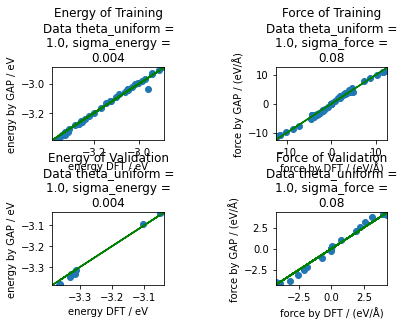

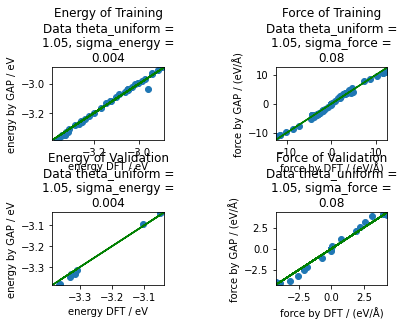

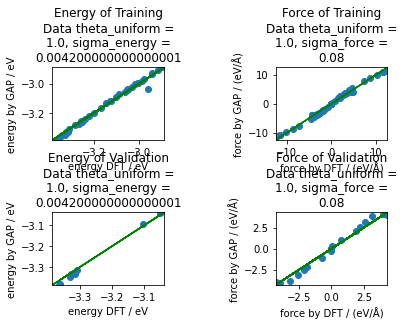

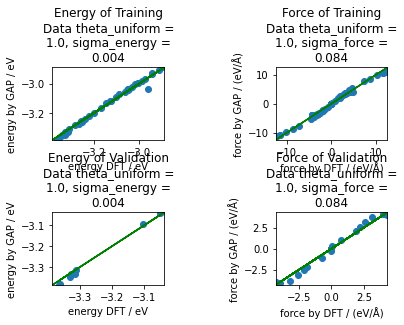

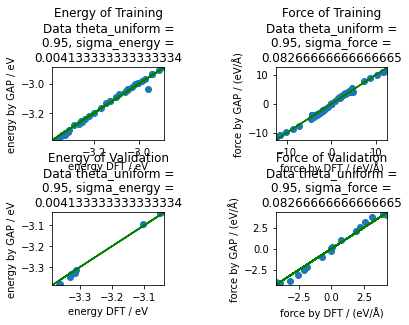

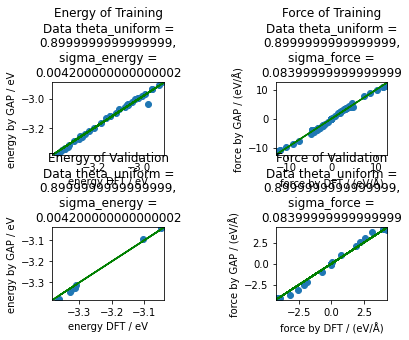

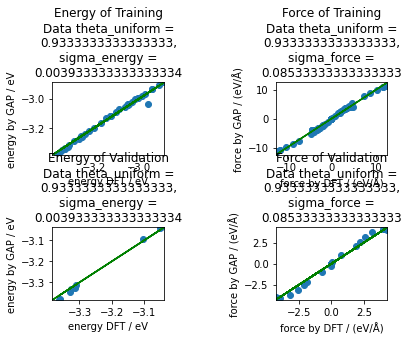

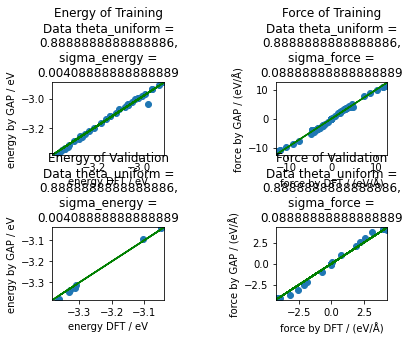

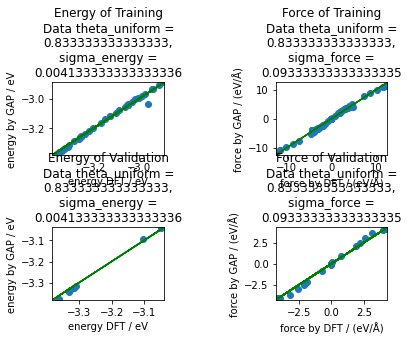

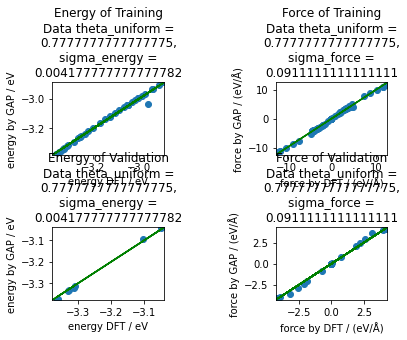

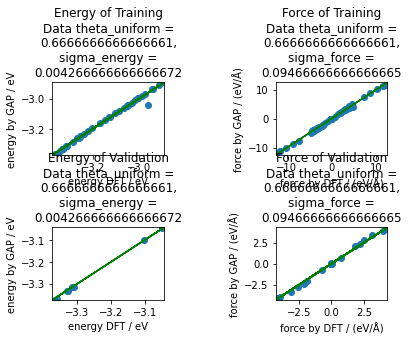

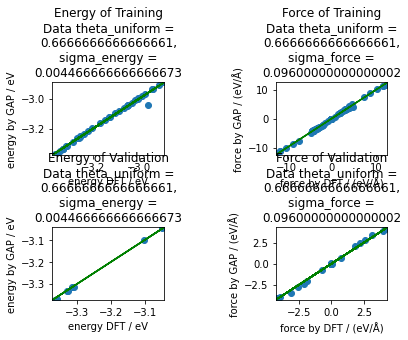

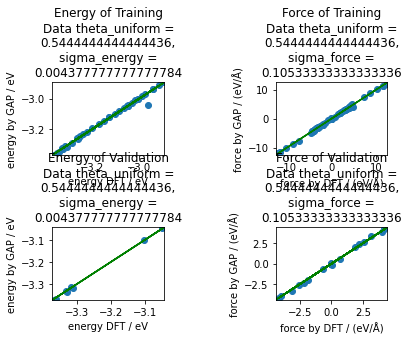

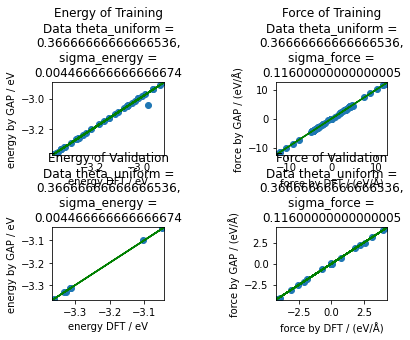

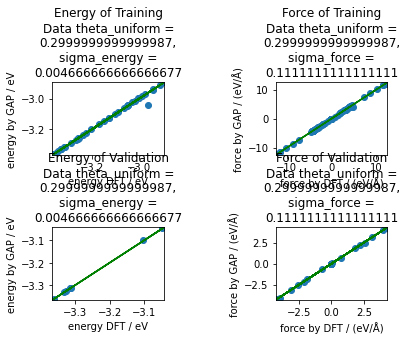

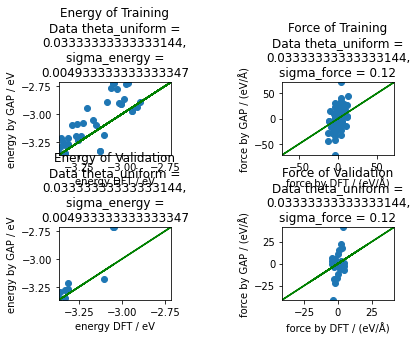

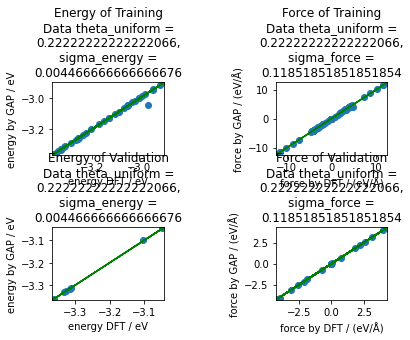

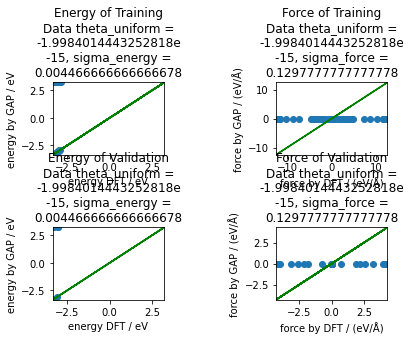

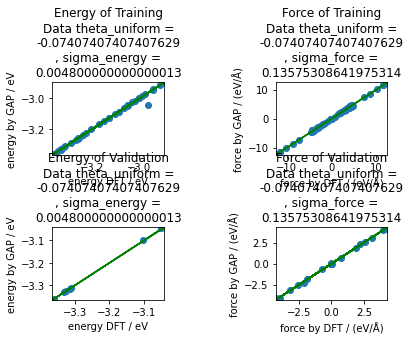

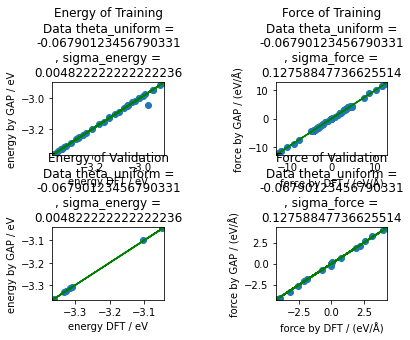

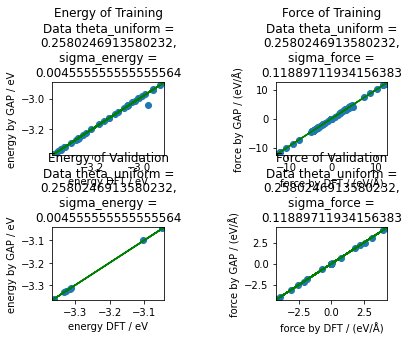

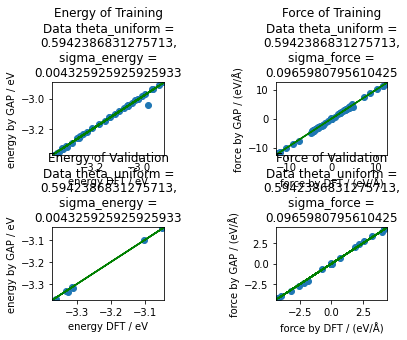

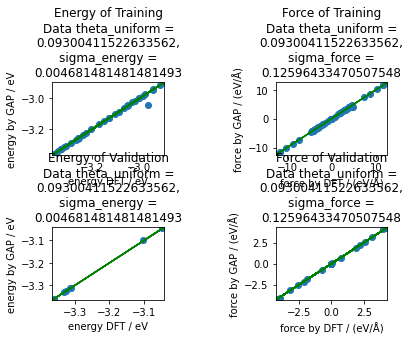

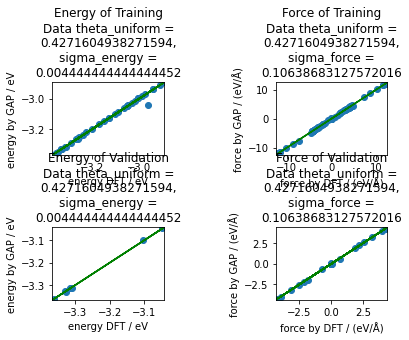

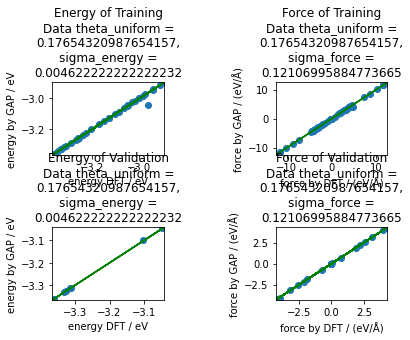

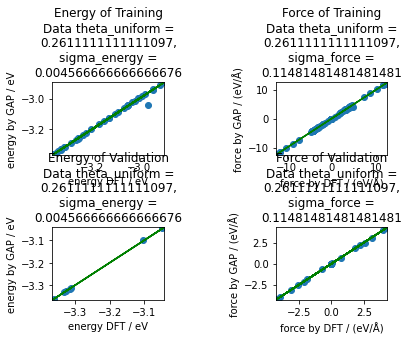

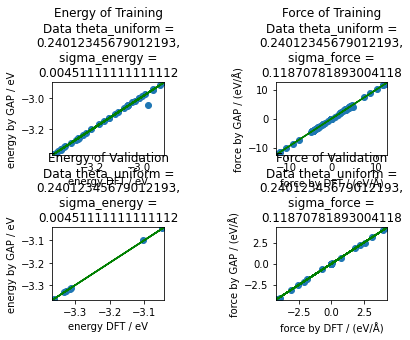

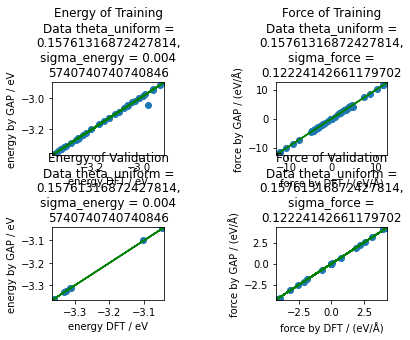

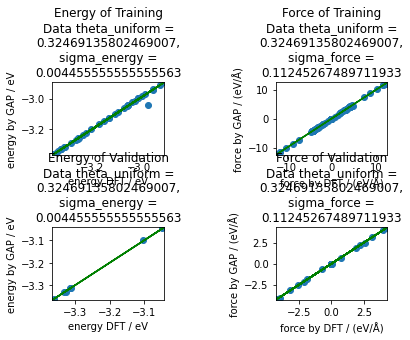

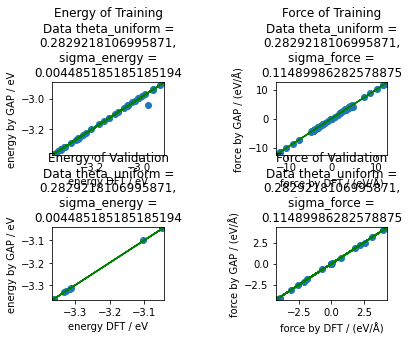

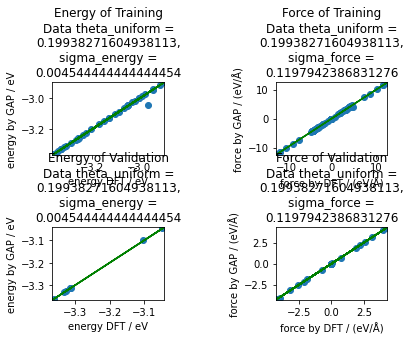

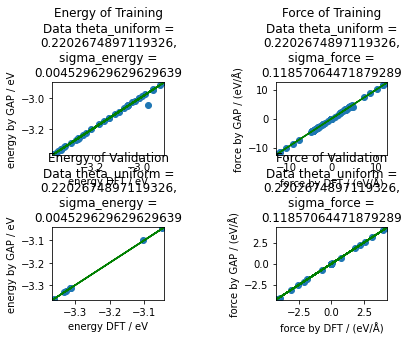

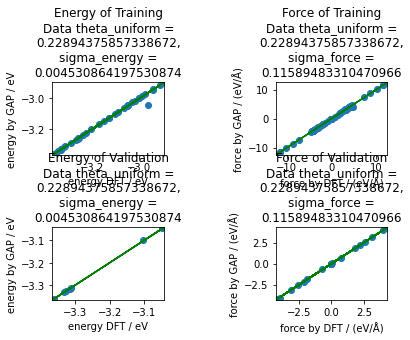

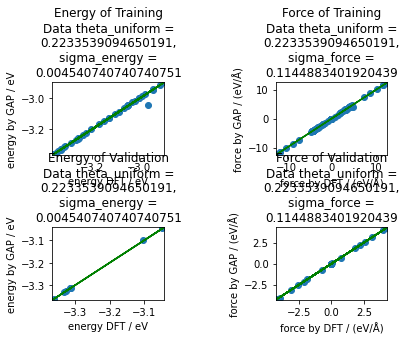

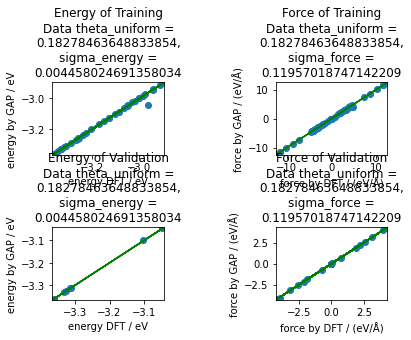

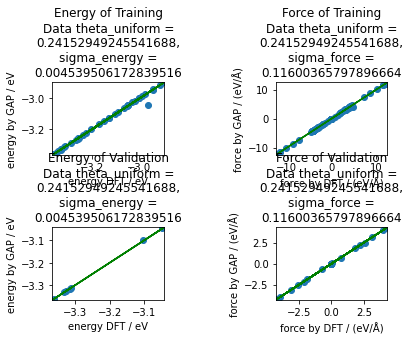

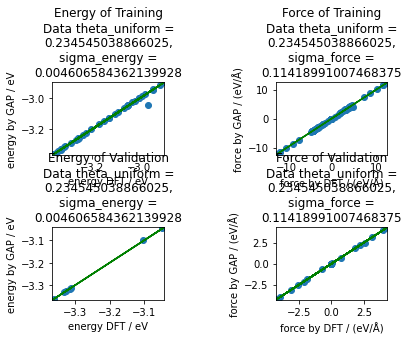

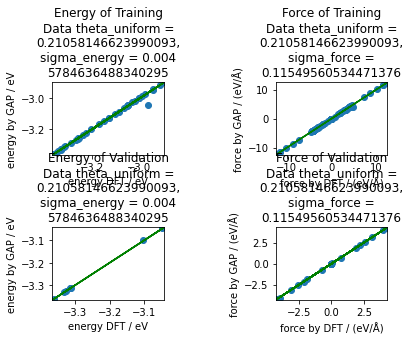

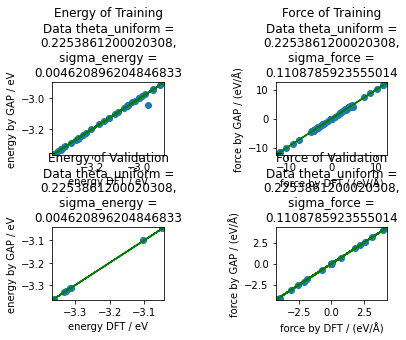

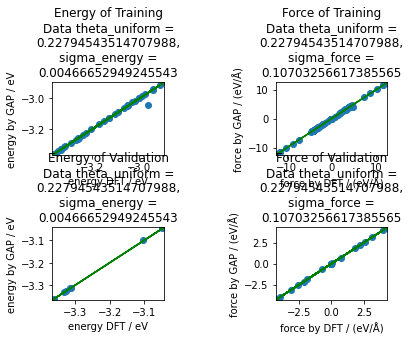

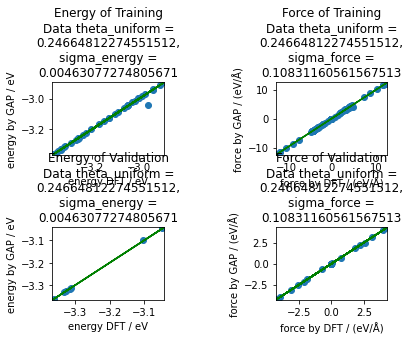

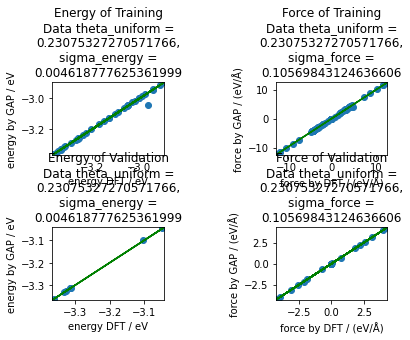

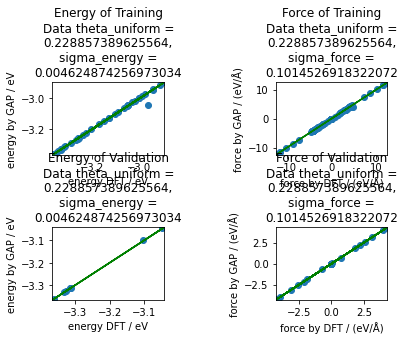

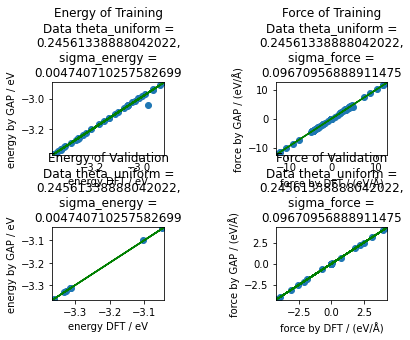

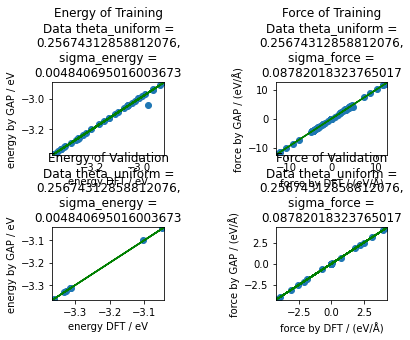

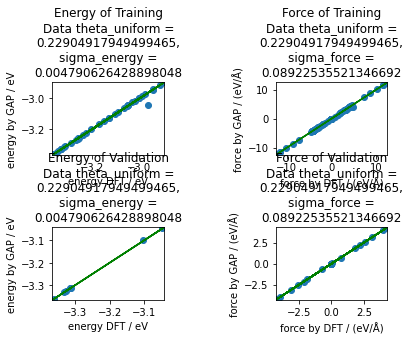

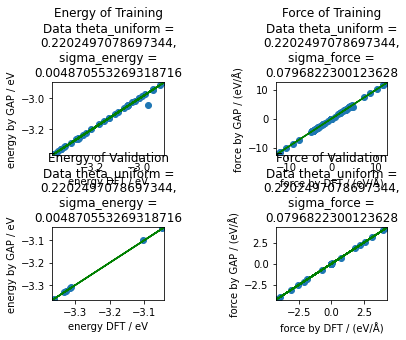

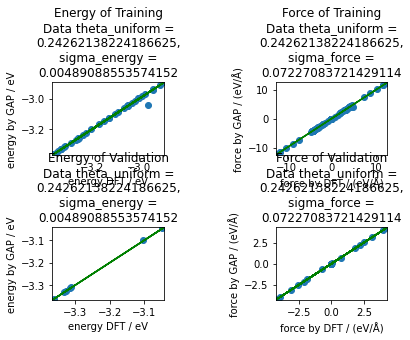

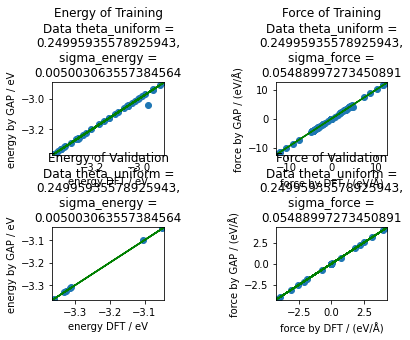

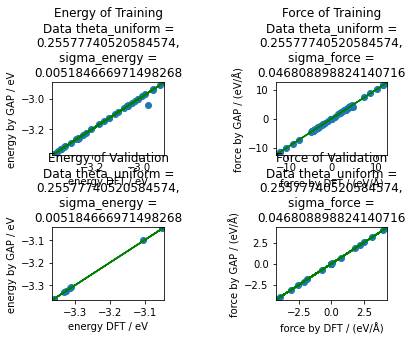

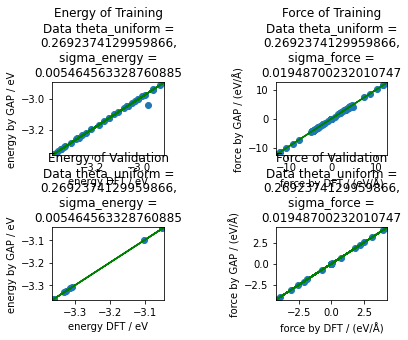

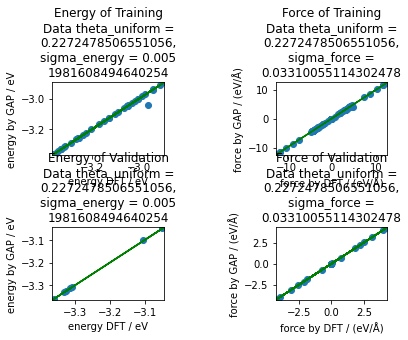

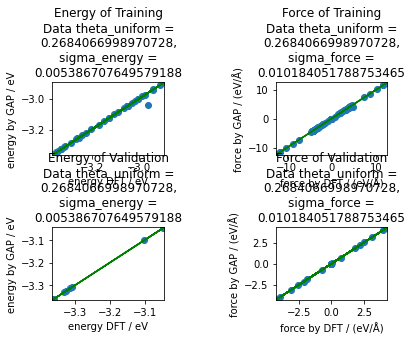

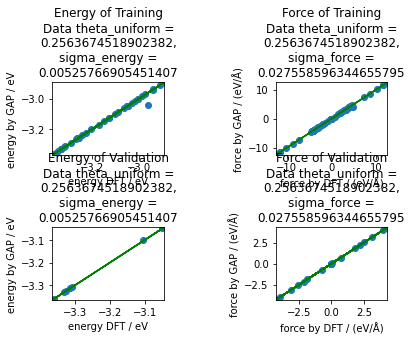

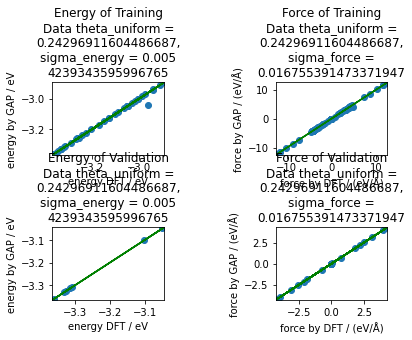

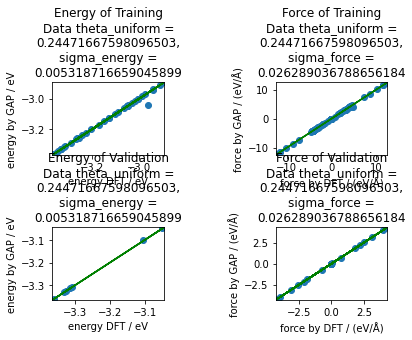

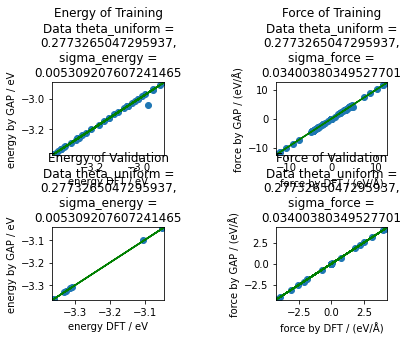

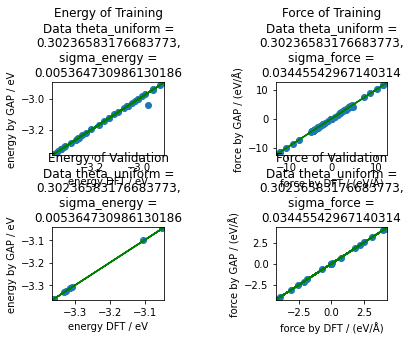

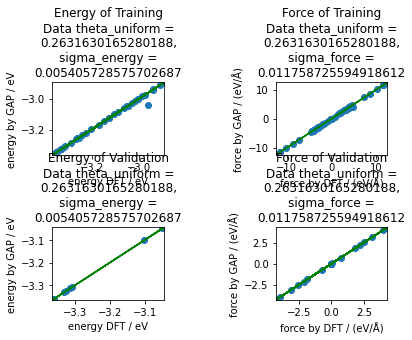

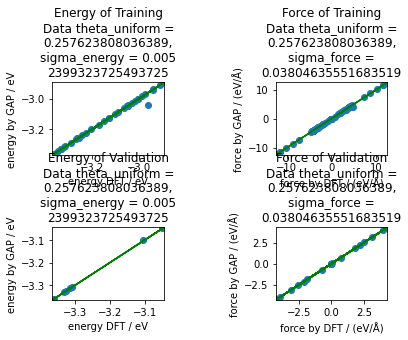

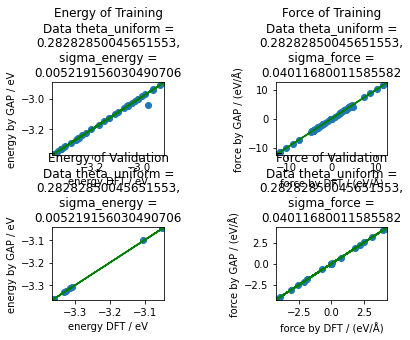

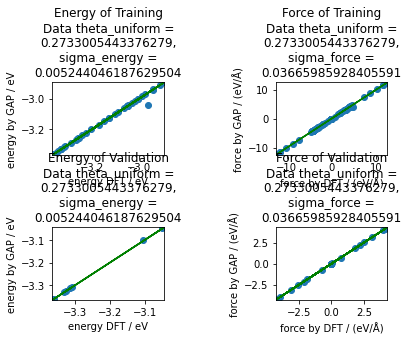

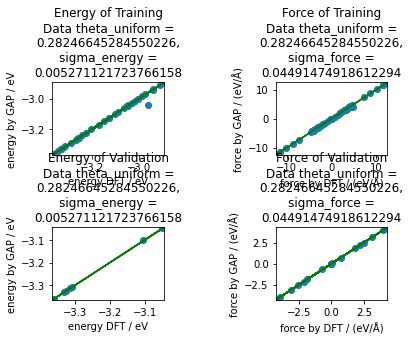

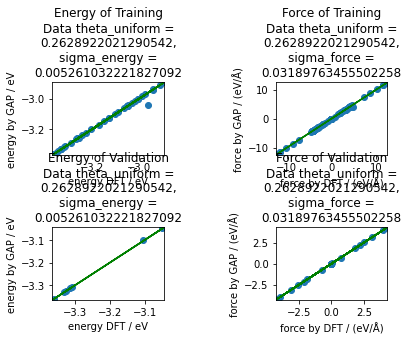

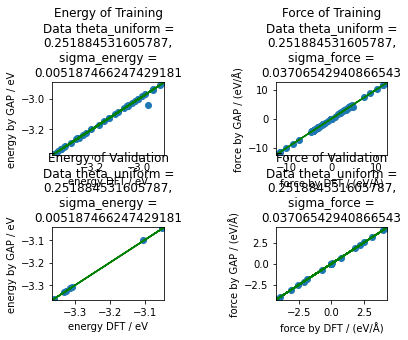

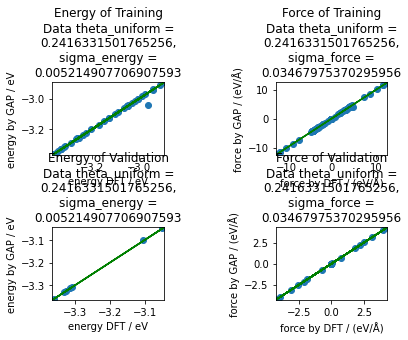

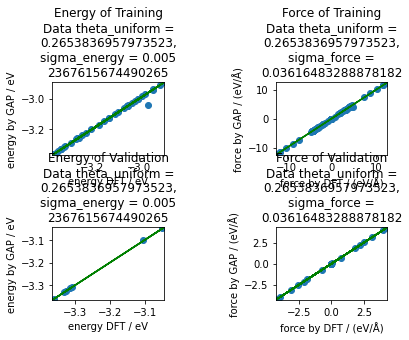

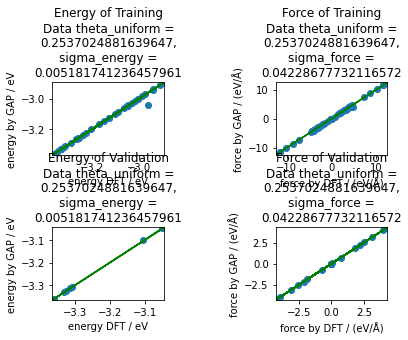

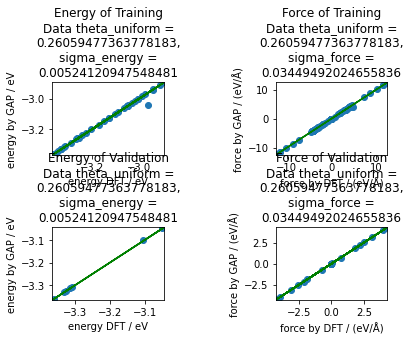

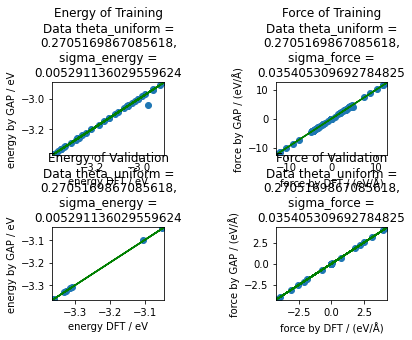

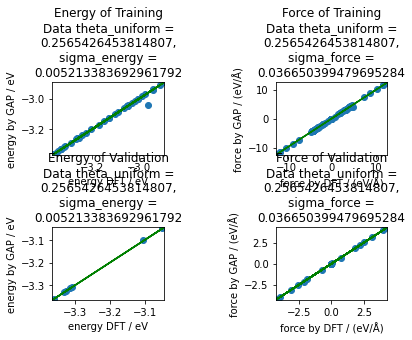

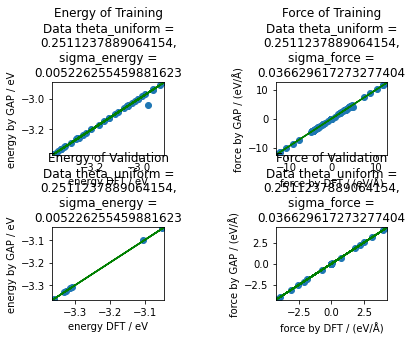

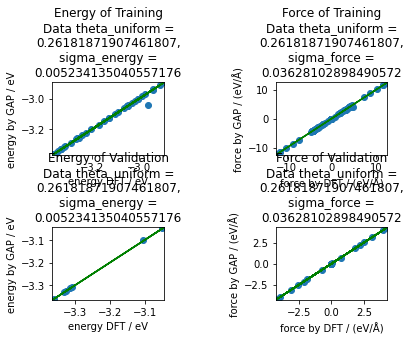

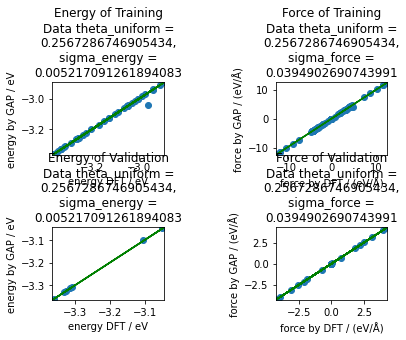

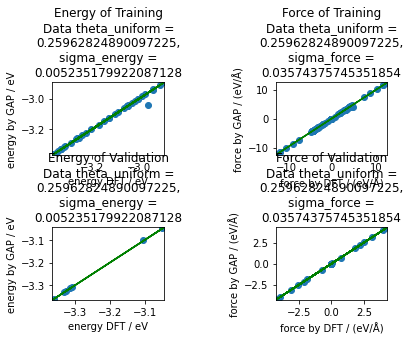

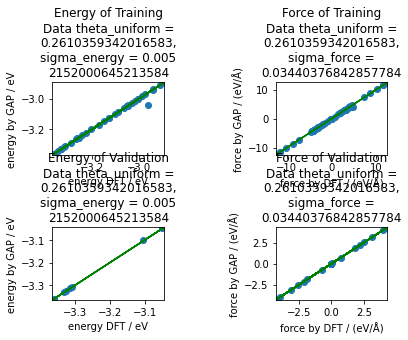

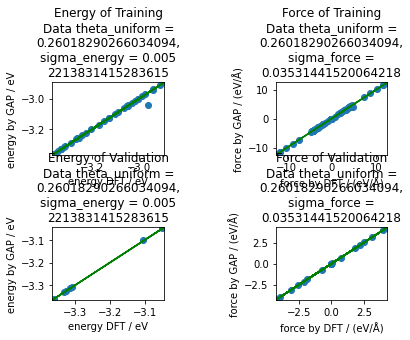

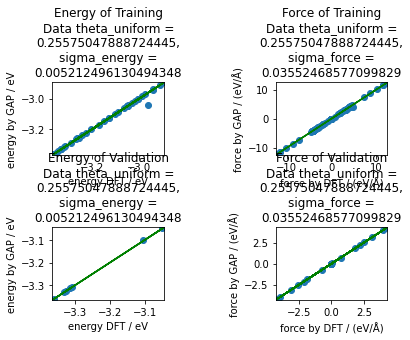

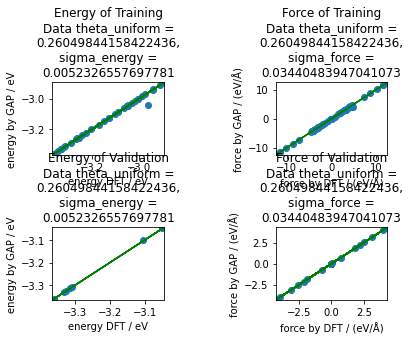

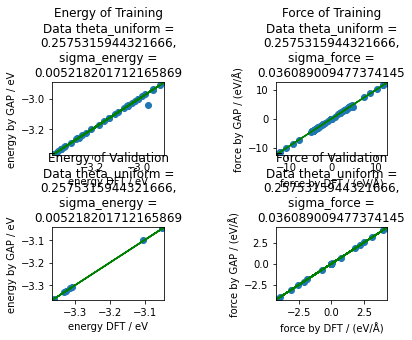

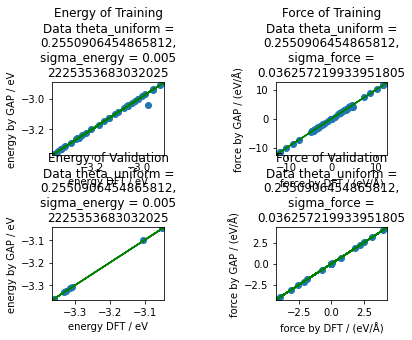

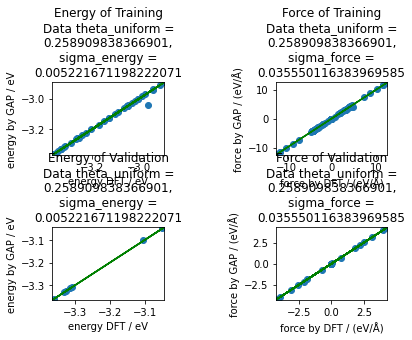

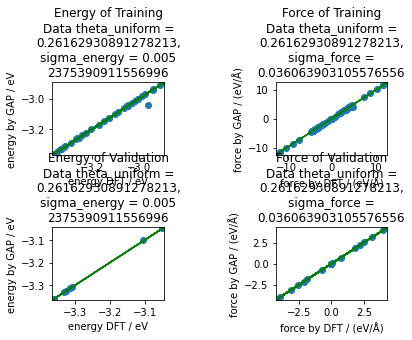

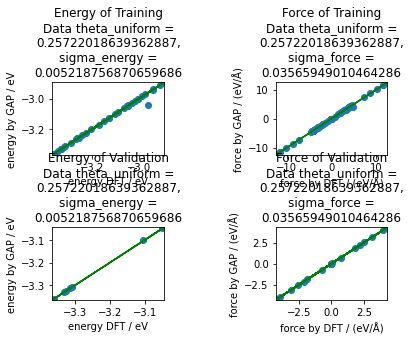

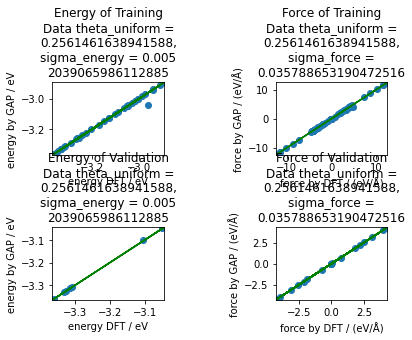

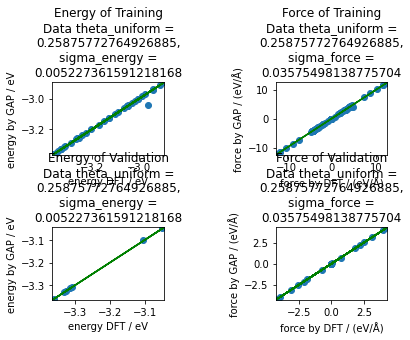

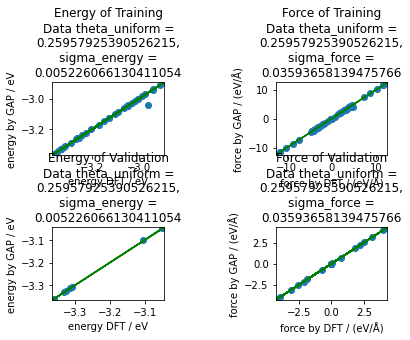

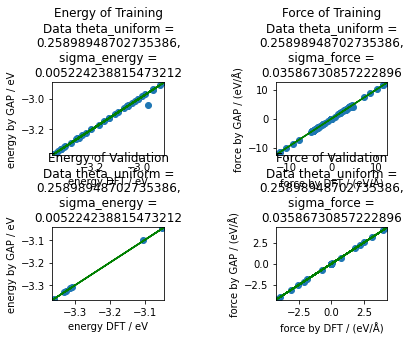

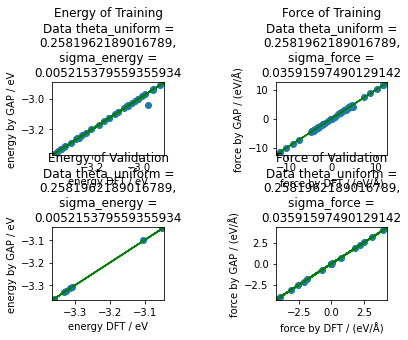

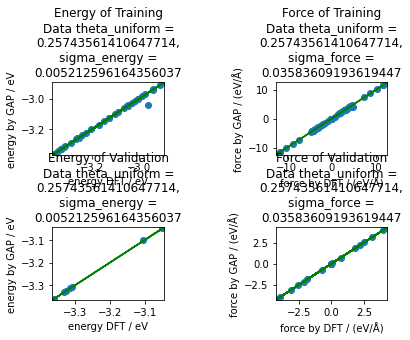

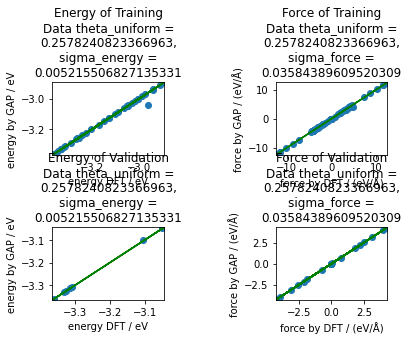

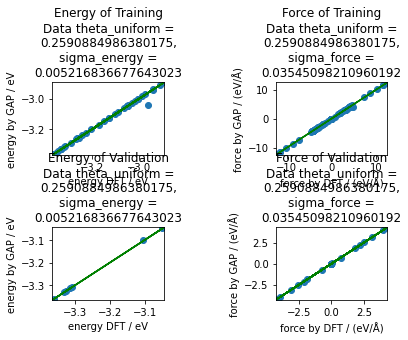

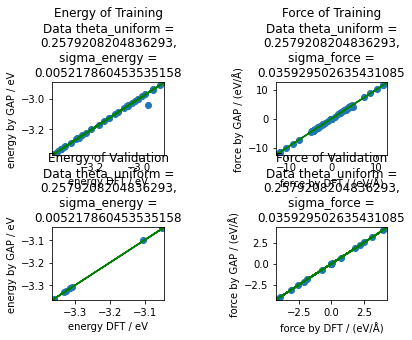

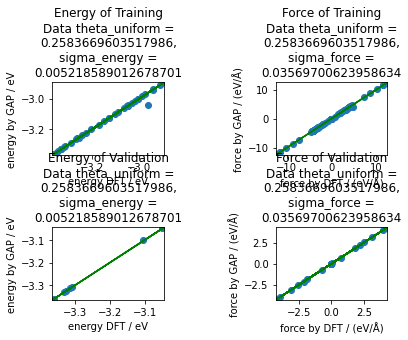

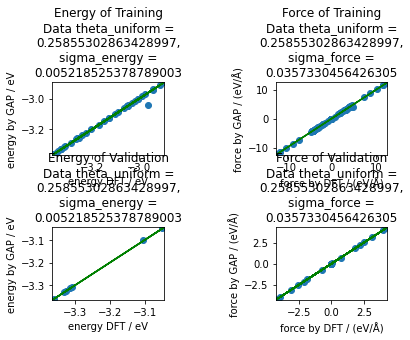

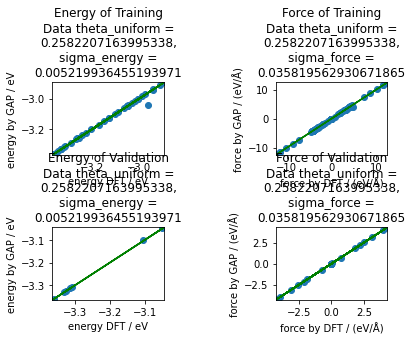

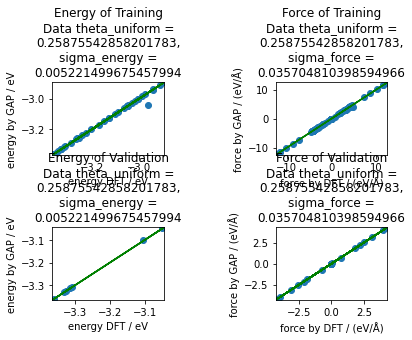

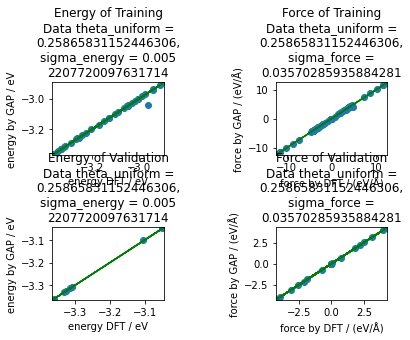

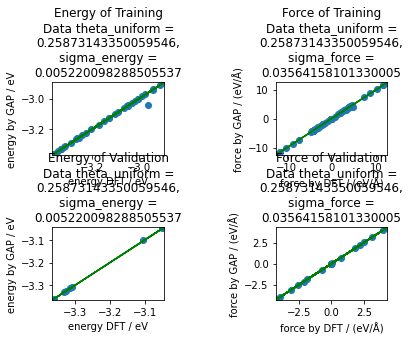

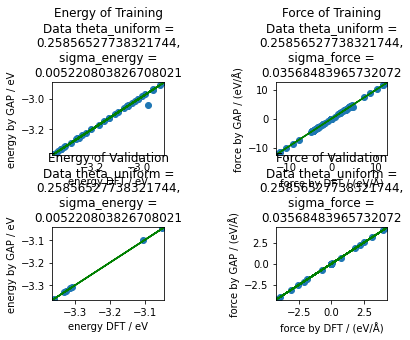

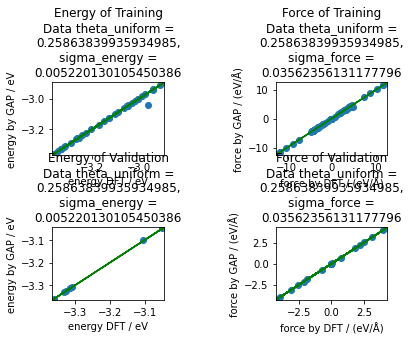

In [34]:
import scipy.optimize
initial_guess = [1,0.004,0.08]
result = scipy.optimize.minimize(RMSE_train_val,initial_guess,method='Nelder-Mead',
                                 options={'fatol':10e-5,'maxiter':50,'disp':True})

In [36]:
result

 final_simplex: (array([[0.25873143, 0.0052201 , 0.03564158],
       [0.25890984, 0.00522167, 0.03555012],
       [0.2586384 , 0.00522013, 0.03562356],
       [0.25856528, 0.0052208 , 0.03568484]]), array([15.06631496, 15.06651052, 15.06655636, 15.06656963]))
           fun: 15.06631496499319
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 101
           nit: 50
        status: 2
       success: False
             x: array([0.25873143, 0.0052201 , 0.03564158])